In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 100)

The purpose of this notebook is to take the raw csv files which contain tons of info following model training (feature_analysis notebook) and make easily interpretable figures from it <br>
What needs to happen: <br>
1) works on one-v-one classifier instead of one-v-rest <br>
2) deal with author v. reprocessed - deal as in only show author if NO reprocessed available / author isnt super cherry picked<br>
3) intial plot with conbimed datasets  <br>

In [3]:
# THE FOLLOWING AUTHOR STUDIES HAVE CHERRY PICKED REPORTED FEATURES:
# cherry picked datasets:
# MTBLS253 - 35
# MTBL279 - 199
# MTBLS358 - 219 - targeted
# MTBLS579 - 198
# ST000284 - 113
# ST000355/6 - 227/272
# ST000383 - 106
# ST000888 - 95
# ST000918 - 77
# MAYBE:
# ST000450 - 421 - best so far
# ST000608 - 422


In [5]:
individual_ds = pd.read_csv('30avg_log_reg_auc_sigfeat_summary_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
combined_ds = pd.read_csv('30avg_log_reg_combined_ds_summary.csv')
combined_metadata = pd.read_csv('combined_ds_metadata.csv')
combined_ds = combined_ds.merge(combined_metadata, on='analysis')
# lr_combined_ds = lr_combined_ds.rename(index=str, columns={"auc": "combined_auc", "auc_std": "combined_auc_std"})
combined_and_indiv = individual_ds.append(combined_ds)
combined_and_indiv = combined_and_indiv.sort_values('study')
# combined_and_indiv
combined_and_indiv = combined_and_indiv.drop(columns=['Unnamed: 0', 'number_labels', 'label'])
combined_and_indiv
# combined_and_indiv.to_csv('all_data_combined_plus_notcombined_LR.csv')

# ok so this df above has all the data from both individual runs and the combined. 
# can do analysis of between combined v not 
# can do analysis of all studies summary - keep only the required dataset for each study. 


/home/ubuntu/data/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Accession,Instrument_category,Instument,analysis,auc,auc_std,case,column,control,disease,disease_type,features,mode,model_nonzero_coef,samples,significant,study,test_size,train_size,type
0,NaN,LC,LTQ orbitrap,plasmaall_author,0.998508,0.001670,59,C18,43,coronary heart disease,cardiovascular,109,positive,109,102,108.0,Feng,19,83,plasma
1,NaN,LC,LTQ orbitrap,urineall_author,0.991390,0.004987,59,C18,43,coronary heart disease,cardiovascular,160,positive,159,102,160.0,Feng,19,83,urine
2,NaN,LC,LTQ orbitrap,serum_IPO_aligned_Feng_serum_batch1,0.994833,0.009081,21,C18,20,coronary heart disease,cardiovascular,5529,positive,63,41,1587.0,Feng,8,33,plasma
3,NaN,LC,LTQ orbitrap,serum_IPO_aligned_Feng_serum_batch2,0.996595,0.005303,38,C18,23,coronary heart disease,cardiovascular,4939,positive,151,61,1110.0,Feng,11,50,plasma
4,NaN,LC,LTQ orbitrap,urine_IPO_aligned_Feng_urine_batch1,0.989778,0.013518,28,C18,21,coronary heart disease,cardiovascular,11102,positive,354,49,1440.0,Feng,9,40,urine
5,NaN,LC,LTQ orbitrap,urine_IPO_aligned_Feng_urine_batch2,0.957698,0.018817,31,C18,22,coronary heart disease,cardiovascular,11884,positive,1082,53,2128.0,Feng,10,43,urine
6,NaN,LC,LTQ orbitrap,serum_onebatch_IPO_align_Feng_serum_all,0.999284,0.001505,59,C18,43,coronary heart disease,cardiovascular,5040,positive,31,102,1523.0,Feng,19,83,plasma
7,NaN,LC,LTQ orbitrap,urine_onebatch_IPO_aligned_Feng_urine_all,0.982196,0.005217,59,C18,43,coronary heart disease,cardiovascular,11934,positive,325,102,2564.0,Feng,19,83,urine
9,NaN,GC,Agilent 5975C MSD,IPO_aligned_MTBLS105_SIM-MS,0.861074,0.017449,40,Phenyl Arylene,49,Hepatocellular carcinoma,cancer,855,positive,13,89,7.0,MTBLS105,17,72,plasma
0,MTBLS105,NaN,NaN,reprocessed_IPO_aligned_MTBLS105_qMS,0.857528,0.039766,40,NaN,49,Hepatocellular carcinoma,cancer,2031,NaN,17,89,NaN,MTBLS105,17,72,NaN


In [6]:
# GETTING DATA FOR SUMMARY PLOT

# combined_and_indiv[['analysis','study','auc', 'auc_std', 'case', 'control', 'features']]
                                              
# to_remove = {'Feng': ['serum_IPO_aligned_Feng_serum_batch1','serum_IPO_aligned_Feng_serum_batch2', 
#                       'urine_IPO_aligned_Feng_urine_batch1', 'urine_IPO_aligned_Feng_urine_batch2'],
#              'MTBLS17': ['IPO_aligned_MTBLS17_negall_guess-opt_1e-3_mzdiff', 'IPO_aligned_MTBLS17_neg_exp1',
#                          'Peaklist_EXP1_POS', 'Peaklist_EXP2_POS', 'Peaklist_EXP3_POS',
#                          'Peaklist_EXP1_NEG', 'Peaklist_EXP2_NEG', 'Peaklist_EXP3_NEG',
#                          'reprocessed_IPO_aligned_MTBLS17_neg_exp3', 'author_Peaklist_EXP3_POS', 
#                          'author_Peaklist_EXP2_POS', 'author_Peaklist_EXP1_POS', 'reprocessed_IPO_aligned_MTBLS17_neg_exp1',
#                          'IPO_aligned_MTBLS17_negall_guess-opt_-1e-4_mzdiff', 'IPO_aligned_MTBLS17_negall_88e-2_bw',
#                          'reprocessed_IPO_aligned_MTBLS17_neg_exp2', 'IPO_aligned_MTBLS17_negall_4_bw', 
#                          'IPO_aligned_MTBLS17_negall_12_bw', 'IPO_aligned_MTBLS17_negall_15_ppm', 
#                          'IPO_aligned_MTBLS17_pos_exp3', 'IPO_aligned_MTBLS17_pos_exp2', 'IPO_aligned_MTBLS17_pos_exp1',
#                          'IPO_aligned_MTBLS17_neg_exp3', 'IPO_aligned_MTBLS17_neg_exp2', 'IPO_aligned_MTBLS17_negall_1e-1_mzwid',
#                          'IPO_aligned_MTBLS17_negall_2000_noise', 'IPO_aligned_MTBLS17_negall_1e-4_mzdiff', 
#                          'IPO_aligned_MTBLS17_negall_3_90_peakwidth', 'IPO_aligned_MTBLS17_negall_3_30_peakwidth', 
#                          'IPO_aligned_MTBLS17_negall_3_10_peakwidth', 'IPO_aligned_MTBLS17_negall_5e-1_profstep',
#                          'IPO_aligned_MTBLS17_negall_3e-2_mzdiff', 'IPO_aligned_MTBLS17_negall_25e-3_mzwid', 
#                          'IPO_aligned_MTBLS17_negall_3e-3_mzdiff'],
#              'MTBLS19': ['Exp1F_POS', 'Exp1R_POS', 'Exp2F_POS', 'Exp2R_POS', 'Exp1F_NEG', 'Exp2F_NEG','Exp1R_NEG',
#                          'Exp2R_NEG', 'IPO_aligned_MTBLS19_neg_exp1_F', 'IPO_aligned_MTBLS19_neg_exp1_R',
#                          'IPO_aligned_MTBLS19_neg_exp2_F','IPO_aligned_MTBLS19_neg_exp2_R', 
#                          'IPO_aligned_MTBLS19_pos_exp1_F','IPO_aligned_MTBLS19_pos_exp2_F',
#                          'IPO_aligned_MTBLS19_pos_exp2_R', 'IPO_aligned_MTBLS19_pos_exp1_R',
#                          'author_Exp2F_POS', 'reprocessed_IPO_aligned_MTBLS19_neg_exp1_F', 
#                          'reprocessed_IPO_aligned_MTBLS19_neg_exp2_F', 'author_Exp1F_POS',
#                          'IPO_aligned_MTBLS19_pos_all_R_R', 'IPO_aligned_MTBLS19_neg_all_R_R'],
#              'ST000392': ['IPO_aligned_ST000392_plasma_15-25_peakwidth', 'IPO_aligned_ST000392_plasma_12_bw',
#                           'IPO_aligned_ST000392_plasma_1e-1_prefilt', 'IPO_aligned_ST000392_plasma_2000_noise',
#                           'IPO_aligned_ST000392_plasma_1_5_profstep', 'IPO_aligned_ST000392_plasma_1e-4_prefilt',
#                           'IPO_aligned_ST000392_plasma_5e-1_profstep', 'IPO_aligned_ST000392_plasma_4_bw',
#                           'IPO_aligned_ST000392_plasma_4-10_peakwidth', 'IPO_aligned_ST000392_plasma_2e-3_mzwid',
#                           'IPO_aligned_ST000392_plasma_2e-1_mzwid', 'IPO_aligned_ST000392_plasma_5e-1_bw'],
#              'ST000865': ['IPO_aligned_ST000865_batch3_raw', 'IPO_aligned_ST000865_batch2_raw'],
#              'ST000381': ['AN000616', 'AN000617']
#              }
# for study in to_remove:
#     for data_set in to_remove[study]:
#         combined_and_indiv = combined_and_indiv[combined_and_indiv.analysis != data_set]

to_keep = ['serum_onebatch_IPO_align_Feng_serum_all', 'urine_onebatch_IPO_aligned_Feng_urine_all',
           'reprocessed_IPO_aligned_MTBLS105_qMS', 'ulsam_IPO_reprocessedfirst',
           'reprocessed_IPO_aligned_MTBLS17_neg_onebatch',
           'reprocessed_IPO_aligned_MTBLS19_neg_all_F_R', 'm_oxylipin_chronic_hep_b',
           'reprocessed_IPO_aligned_MTBLS266_neg', 'author_m_chronic_hep_b_POS',
           'reprocessed_IPO_aligned_MTBLS28_neg', 'reprocessed_IPO_aligned_MTBLS315_mzData',
#            'IPO_aligned_MTBLS352_neg_0_NGT', 'IPO_aligned_MTBLS352_neg_1_T2D', 'IPO_aligned_MTBLS352_neg_2_Pre-DM',
           'IPO_aligned_MTBLS352_neg_T2D_NGT', 'IPO_aligned_MTBLS352_neg_T2D_Pre-DM', 'IPO_aligned_MTBLS352_neg_NGT_Pre-DM',
           'reprocessed_IPO_aligned_MTBLS354_neg', 
           #'author_m_CER_mass_spectrometry_v4_2_FS', 'author_m_CER_mass_spectrometry_v4_3_CS', 'author_m_CER_mass_spectrometry_v4_0_NS','author_m_CER_mass_spectrometry_v4_1_COPD', 
           'author_m_CER_mass_spectrometry_v4_FS_NS', 'author_m_CER_mass_spectrometry_v4_COPD_FS', 'author_m_CER_mass_spectrometry_v4_COPD_CS',
           'author_m_CER_mass_spectrometry_v4_COPD_NS', 'author_m_CER_mass_spectrometry_v4_FS_CS', 'author_m_CER_mass_spectrometry_v4_CS_NS',
           'reprocessed_IPO_aligned_MTBLS364_hil_neg',
           'reprocessed_IPO_aligned_MTBLS408_neg', 'm_typhoid_carriage_metabolite_profiling_mass_spectrometry_v2_maf',
           'reprocessed_IPO_aligned_MTBLS72_neg', 'IPO_aligned_MTBLS92', 
           #'reprocessed_IPO_aligned_ST000045_2feb_pos_1_II', 'reprocessed_IPO_aligned_ST000045_2feb_pos_0_ND', 'reprocessed_IPO_aligned_ST000045_2feb_pos_2_IW',
           'reprocessed_IPO_aligned_ST000045_2feb_pos_ND_IW', 'reprocessed_IPO_aligned_ST000045_2feb_pos_ND_II', 'reprocessed_IPO_aligned_ST000045_2feb_pos_II_IW',
#            'reprocessed_IPO_aligned_ST000046_20120613_neg', 'reprocessed_IPO_aligned_ST000046_20120613_neg_hilic_2_MCI',
#            'reprocessed_IPO_aligned_ST000046_20120618_pos_c18_0_CN', 'reprocessed_IPO_aligned_ST000046_20120618_pos_c18_1_AD',
#            'reprocessed_IPO_aligned_ST000046_20120613_neg_hilic_0_CN', 'reprocessed_IPO_aligned_ST000046_20120618_pos_c18_2_MCI',
           'reprocessed_IPO_aligned_ST000046_20120606_neg_hilic_CN_MCI', 'reprocessed_IPO_aligned_ST000046_20120606_neg_hilic_CN_AD',
           'reprocessed_IPO_aligned_ST000046_20120606_neg_hilic_MCI_AD', 'reprocessed_IPO_aligned_ST000046_20120613_neg_hilic_CN_MCI',
           'reprocessed_IPO_aligned_ST000046_20120613_neg_hilic_CN_AD', 'reprocessed_IPO_aligned_ST000046_20120613_neg_hilic_MCI_AD',
#            'XCMS-Report-annotated-SingleClass-GCTOF.plasma','XCMS-Report-annotated-SingleClass-GCTOF.',
           'reprocessed_XCMS-Report-annotated-SingleClass-GCTOF',
#            'AN000452_0_Healthy', 'AN000452_2_Polyp', 'AN000452_1_CRC',
           'AN000452_Healthy_CRC', 'AN000452_Healthy_Polyp', 'AN000452_CRC_Polyp',
#            'reprocessed_IPO_aligned_ST000329_neg_1_MCD', 'reprocessed_IPO_aligned_ST000329_pos_0_Control', 'reprocessed_IPO_aligned_ST000329_pos_2_FSGS',
           'reprocessed_IPO_aligned_ST000329_pos_MCD_FSGS', 'reprocessed_IPO_aligned_ST000329_pos_MCD_Control', 'reprocessed_IPO_aligned_ST000329_pos_FSGS_Control',
           'author_AN000580', 'author_AN000582', 'IPO_aligned_ST000381_pos', 'AN000618', 
#            'reprocessed_IPO_aligned_ST000385_adc2_plasma','reprocessed_IPO_aligned_ST000385_adc1_plasma', 
           'reprocessed_IPO_aligned_ST000385_onebatch_plasma',
#            'IPO_aligned_ST000388_LC', 'IPO_aligned_ST000388_GC',
           'reprocessed_ST000388',
           'reprocessed_IPO_aligned_ST000392_plasma','IPO_aligned_ST000396', 'author_AN000705', 
           'reprocessed_IPO_aligned_ST000578_AE', 'author_AN000929', 
#            'reprocessed_IPO_aligned_ST000763_untar_neg_0_Healthy','reprocessed_IPO_aligned_ST000763_untar_neg_4_PAH', 
#            'reprocessed_IPO_aligned_ST000763_untar_neg_1_LowRisk', 'reprocessed_IPO_aligned_ST000763_untar_neg_3_Borderline Pressures', 'reprocessed_IPO_aligned_ST000763_untar_neg_2_Normal Pressures',
           'reprocessed_IPO_aligned_ST000763_untar_pos_Healthy_PAH', 'reprocessed_IPO_aligned_ST000763_untar_pos_Healthy_Normal Pressures',
           'reprocessed_IPO_aligned_ST000763_untar_pos_Healthy_Borderline Pressures', 'reprocessed_IPO_aligned_ST000763_untar_pos_Healthy_LowRisk',
           'reprocessed_IPO_aligned_ST000763_untar_pos_PAH_Normal Pressures', 'reprocessed_IPO_aligned_ST000763_untar_pos_PAH_Borderline Pressures',
           'reprocessed_IPO_aligned_ST000763_untar_pos_PAH_LowRisk', 'reprocessed_IPO_aligned_ST000763_untar_pos_Normal Pressures_Borderline Pressures',
           'reprocessed_IPO_aligned_ST000763_untar_pos_Normal Pressures_LowRisk', 'reprocessed_IPO_aligned_ST000763_untar_pos_Borderline Pressures_LowRisk',
           'IPO_aligned_ST000865_onebatch', 'AN001450', 'AN001503']

kept = combined_and_indiv.loc[combined_and_indiv['analysis'].isin(to_keep)]
summary_w_metadata = kept
summary_w_metadata = summary_w_metadata[['study','analysis','auc','auc_std','disease', 'disease_type', 'case', 'control', 'samples', 'features', 'significant', 'model_nonzero_coef','Instrument_category']]
summary_w_metadata
#### TO DO:
# MTBLS352 is a multiclass, MTBLS358 (also targeted), st000045, ST000046, ST000329,ST000763

# author only:
# ST000383, ST000450, ST000608, ST000888, ST000918, MTBLS279, MTBLS253, MTBLS358 (targeted), MTBLS579,
# ST000355/356, ST000383, 

# only show models and DS with auc when features are not from a minimal set determined via the authors...
    # go back and check all the author studies for which are like this

,study,analysis,auc,auc_std,disease,disease_type,case,control,samples,features,significant,model_nonzero_coef,Instrument_category
6,Feng,serum_onebatch_IPO_align_Feng_serum_all,0.999284,0.001505,coronary heart disease,cardiovascular,59,43,102,5040,1523.0,31,LC
7,Feng,urine_onebatch_IPO_aligned_Feng_urine_all,0.982196,0.005217,coronary heart disease,cardiovascular,59,43,102,11934,2564.0,325,LC
0,MTBLS105,reprocessed_IPO_aligned_MTBLS105_qMS,0.857528,0.039766,Hepatocellular carcinoma,cancer,40,49,89,2031,NaN,17,NaN
11,MTBLS124,ulsam_IPO_reprocessedfirst,0.573793,0.019864,acute myocardial infarction,cardiovascular,102,936,1038,7814,0.0,611,LC
4,MTBLS17,reprocessed_IPO_aligned_MTBLS17_neg_onebatch,0.728115,0.019278,hepatocellular carcinoma,cancer,77,184,261,34420,NaN,31552,NaN
12,MTBLS19,reprocessed_IPO_aligned_MTBLS19_neg_all_F_R,0.814333,0.022711,hepatocellular carcinoma,cancer,40,50,90,13786,NaN,1058,NaN
66,MTBLS253,m_oxylipin_chronic_hep_b,0.730107,0.046075,chronic hepatitis B,infectious,67,19,86,35,1.0,18,LC
14,MTBLS266,reprocessed_IPO_aligned_MTBLS266_neg,0.916296,0.046854,Age related metabolomics,other,15,15,30,36991,NaN,2373,NaN
15,MTBLS279,author_m_chronic_hep_b_POS,0.925009,0.025051,chronic hepatitis B,infectious,69,19,88,199,NaN,159,NaN
17,MTBLS28,reprocessed_IPO_aligned_MTBLS28_neg,0.856954,0.005056,Lung cancer,cancer,469,536,1005,9908,NaN,337,NaN


In [7]:
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib import gridspec
from matplotlib.lines import Line2D

o_v_o = ['MTBLS352','MTBLS358','ST000045', 'ST000046', 'ST000284', 'ST000329', 'ST000763']
not_combined = ['Feng', 'ST000046']
study_spec = {study:'' for study in list(summary_w_metadata.study.unique())}
for study in o_v_o:
    study_spec[study] += '*'
for study in not_combined:
    study_spec[study] += '^'

# sorting the data to get diseases next to each other and then subcategories (cancer types) together
fig_1a_df = summary_w_metadata.sort_values(by=['disease_type'])
fig_1a_df.disease = fig_1a_df.disease.str.lower()
types = fig_1a_df.disease_type.unique()
df_list = []
for dis_type in types:
    df_list.append(fig_1a_df[fig_1a_df.disease_type == dis_type].sort_values(by=['disease']))
fig_1a_df = pd.concat(df_list)
fig_1a_df = fig_1a_df.reset_index()
# now need to get the x / y values:
#   x's = the auc values
x = fig_1a_df['auc']

#   y's = turn the study into a number (get a list and enumerate )
study_to_y = fig_1a_df.study.unique()
study_ds = list(fig_1a_df.study)
y_loc = list(range(1,10*len(study_to_y),5))
study_to_num = {study:i for i,study in zip(y_loc,study_to_y)}
y = [study_to_num[study] for study in study_ds]
# old temp labels:
# temp_y_labels = ['{}s_{}'.format(study_spec[study], i+1) for i,study in enumerate(study_to_y)]
df_uni_study = fig_1a_df.drop_duplicates(subset='study')
labels = df_uni_study.disease
temp_y_labels = ['{}{}'.format(study_spec[study], disease) for study,disease in zip(study_to_y,labels)]


# need the shape of the marker
names = list(fig_1a_df.analysis)
shapes = ['o' if ('IPO' in name or 'XCMS' in name or 'reprocessed' in name) else '>'for name in names]

# need the color of the marker - list of numbers where a number is the same for all disease_types
disease_types_unique = fig_1a_df.disease_type.unique()
color_fractions = {i:int(i)/(len(disease_types_unique)-1) for i in range(len(disease_types_unique))}
disease_types = list(fig_1a_df.disease_type)
disease_to_num = {disease:i for i,disease in enumerate(disease_types_unique)}
colors = [disease_to_num[disease] for disease in disease_types]
cmap = matplotlib.cm.get_cmap('rainbow')
# colors for legend
disease_to_color_legend = [(disease,cmap(color_fractions[disease_to_num[disease]])) for disease in disease_to_num]
legend_data = [['author data', 'k', 'k', '>'],
               ['reprocessed data', 'k', 'k', 'o']]
for ele in disease_to_color_legend[::-1]:
    legend_data.append([ele[0], ele[1], 'k','s'])
patches_bar = []
for ele in legend_data:
    patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=10))
    
# colors for plotting
colors = [cmap(color_fractions[ele]) for ele in colors]

# get the train / test sizes for the bar chart
min_fig_1a_df = fig_1a_df.drop_duplicates('study')
case = list(min_fig_1a_df.case)
control = list(min_fig_1a_df.control)
#get the colors for the bar plot:
bar_disease_types = list(min_fig_1a_df.disease_type)
bar_colors = [disease_to_num[disease] for disease in bar_disease_types]
bar_colors = [cmap(color_fractions[ele]) for ele in bar_colors]


/home/ubuntu/data/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


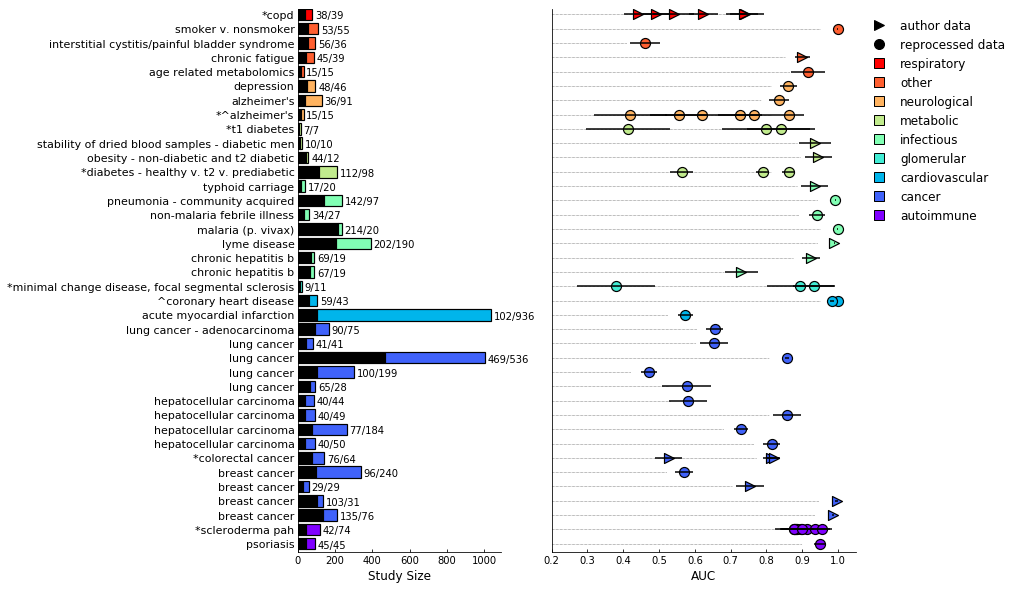

In [8]:
# making the publication plot of auc v study. 
def get_biggest_study_auc(xs,ys):
    x_line, y_line = [], []
    best_x_for_y = {i:0 for i in set(ys)}
    for x_, y_ in zip(xs,ys):
        if x_ > best_x_for_y[y_]:
            best_x_for_y[y_] = x_
    for k,v in sorted(best_x_for_y.items()):
        x_line.append(v)
        y_line.append(k)
    return x_line, y_line

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3]) 
ax = plt.subplot(gs[1])
ax2 = plt.subplot(gs[0])

# plot the error bars so they are behind
ax.errorbar(x, y, xerr=fig_1a_df['auc_std'], fmt='none', ecolor='k')

# plot the auc data:
for x_,y_,m_,c_ in zip(x,y,shapes,colors): 
    ax.scatter(x_, y_, marker=m_, c=c_, s=100, alpha=1, cmap='rainbow', linewidth=1.2, edgecolor='k')
    
# need to get for each study the farthest point so you draw one dashed line:
line_x,line_y = get_biggest_study_auc(x,y)
for x_, y_ in zip(line_x, line_y):
    ax.plot([0,x_-0.05],[y_,y_], 'k:', linewidth=0.5)
ax.yaxis.set_ticks(np.arange(1, y[-1]+5, 5))
# ax.set_yticklabels(temp_y_labels, fontname='Dejavu Sans', fontsize=11)
ax.set_yticklabels([])

# ax.yaxis.set_ticks_position([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([0.2,1.05])
ax.set_ylim([-2,y[-1]+2])
ax.tick_params(direction='in', left='off')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    tick.label.set_fontproperties('Dejavu Sans')
ax.set_xlabel('AUC', fontname='Dejavu Sans', fontsize=12)

# make legend:
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
lgd = ax.legend(handles=patches_bar, bbox_to_anchor=(1, 1), frameon=False, prop=font)

# make the study size plot:
# ax2 = fig.add_subplot(121)

p1 = ax2.barh(line_y, case, height=4, color='k', linewidth=1.2, edgecolor='k')
p2 = ax2.barh(line_y, control, left=case, height=4, color=bar_colors, linewidth=1.2, edgecolor='k')
# currently colors is one for each dot..want one for each study. 

ax2.yaxis.set_ticks(np.arange(1, y[-1]+5, 5))
ax2.set_yticklabels(temp_y_labels, fontname='Dejavu Sans', fontsize=11)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim([-2,y[-1]+2])
ax2.tick_params(direction='in', left='off')
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    tick.label.set_fontproperties('Dejavu Sans')
ax2.set_xlabel('Study Size', fontname='Dejavu Sans', fontsize=12)

for case_n, control_n, y_val in zip(case,control,np.arange(1, y[-1]+5, 5)):
    ax2.text(int(case_n)+int(control_n)+15, y_val-1.5, '{}/{}'.format(case_n,control_n), fontname='Dejavu Sans', fontsize=10)

# plt.tight_layout()
# plt.show()
plt.savefig('RF_Fig1.eps', format='eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [9]:
# this is for getting the data when you plot all datasets for one study on a plot. 
### keeping author ONLY if no reprocessed data. 
dataset_names_mask = []
with open('indiv_dataset_names.txt', 'r') as f:
    for line in f:
        line = line.strip()
        dataset_names_mask.append(line)
select_dataset_summary = combined_and_indiv.loc[combined_and_indiv['analysis'].isin(dataset_names_mask)].reset_index()
select_dataset_summary = select_dataset_summary.drop(columns=['index', 'Accession'])
# select_dataset_summary[select_dataset_summary['study']=='ST000389'] = 'ST000388'
select_dataset_summary.replace('ST000389', 'ST000388', inplace=True)
select_dataset_summary

,Instrument_category,Instument,analysis,auc,auc_std,case,column,control,disease,disease_type,features,mode,model_nonzero_coef,samples,significant,study,test_size,train_size,type
0,LC,LTQ orbitrap,serum_onebatch_IPO_align_Feng_serum_all,0.999284,0.001505,59,C18,43,coronary heart disease,cardiovascular,5040,positive,31,102,1523.0,Feng,19,83,plasma
1,LC,LTQ orbitrap,urine_onebatch_IPO_aligned_Feng_urine_all,0.982196,0.005217,59,C18,43,coronary heart disease,cardiovascular,11934,positive,325,102,2564.0,Feng,19,83,urine
2,GC,Agilent 5975C MSD,IPO_aligned_MTBLS105_SIM-MS,0.861074,0.017449,40,Phenyl Arylene,49,Hepatocellular carcinoma,cancer,855,positive,13,89,7.0,MTBLS105,17,72,plasma
3,GC,Agilent 5975C MSD,IPO_aligned_MTBLS105_qMS,0.608185,0.050987,40,Phenyl Arylene,49,Hepatocellular carcinoma,cancer,1176,positive,1176,89,0.0,MTBLS105,17,72,plasma
4,LC,Waters Xevo G2 QTof,ulsam_IPO_reprocessedfirst,0.573793,0.019864,102,C8,936,acute myocardial infarction,cardiovascular,7814,positive,611,1038,0.0,MTBLS124,207,831,plasma
5,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS17_neg_onebatch,0.706453,0.021456,77,C18,184,hepatocellular carcinoma,cancer,13652,negative,2548,261,569.0,MTBLS17,51,210,serum
6,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS17_pos_onebatch,0.726721,0.027040,77,C18,184,hepatocellular carcinoma,cancer,20768,positive,10625,261,173.0,MTBLS17,51,210,serum
7,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS19_pos_all_F_R,0.821250,0.031509,40,C18,50,hepatocellular carcinoma,cancer,8623,negative,999,90,300.0,MTBLS19,18,72,serum
8,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS19_neg_all_F_R,0.796250,0.029003,40,C18,50,hepatocellular carcinoma,cancer,5163,negative,3628,90,287.0,MTBLS19,18,72,serum
9,LC,Agilent 6460 Triple Quadrupole,m_oxylipin_chronic_hep_b,0.730107,0.046075,67,C18,19,chronic hepatitis B,infectious,35,negative,18,86,1.0,MTBLS253,16,70,serum


/home/ubuntu/data/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


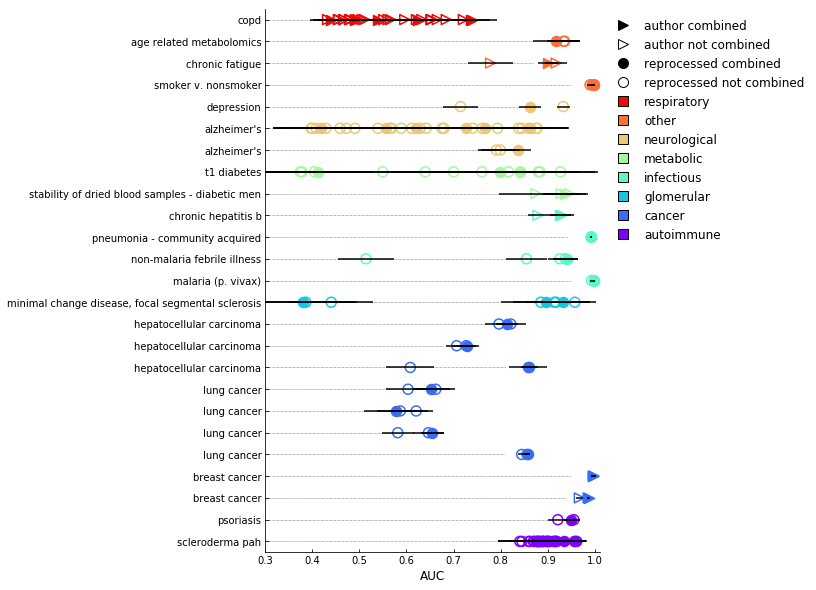

<Figure size 432x288 with 0 Axes>

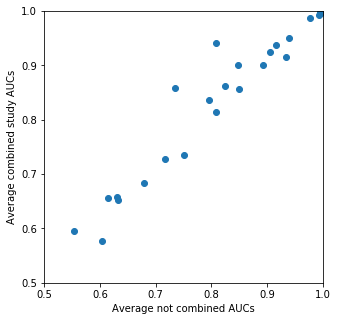

In [10]:
# comparing the combined with the non combined studies
def get_biggest_study_auc(xs,ys):
    x_line, y_line = [], []
    best_x_for_y = {i:0 for i in set(ys)}
    for x_, y_ in zip(xs,ys):
        if x_ > best_x_for_y[y_]:
            best_x_for_y[y_] = x_
    for k,v in sorted(best_x_for_y.items()):
        x_line.append(v)
        y_line.append(k)
    return x_line, y_line

def extract_info(single_disease_df, type_to_color):
    # get ys - SAME for all examples in one study
    y_mapper = {study:i+1 for i, study in enumerate(list(single_disease_df['study'].unique()))}
    ys = [y_mapper[study] for study in list(single_disease_df['study'])]
    # get xs - just the AUC values
    xs = list(single_disease_df['auc'])
    # x-error
    xs_err = list(single_disease_df['auc_std'])
    # get the shapes - o for reprocessed, ^ for author
    shapes = ['o' if ('XCMS' in name or 'IPO' in name or 'reprocessed' in name) else '>' for name in list(single_disease_df.analysis)]
    # get the colors - depends on sample type
    colors = [type_to_color[t] for t in list(single_disease_df.disease_type)]
    # get fills - filled for LC, no fill for GC
    # either 'none' or the color of the sample type
    fills = [color if 'author' in name or 'reprocessed' in name else 'none' for color, name in zip(colors, list(single_disease_df.analysis))]
    # get the labels - the specific disease
    single_disease_df_uni_study = single_disease_df.drop_duplicates(subset='study')
    labels = single_disease_df_uni_study.disease
    # get the disease category
    categories = single_disease_df.disease_type.unique()
    return xs, ys, xs_err, shapes, colors, fills, labels, categories

# merge the 'select_dataset_summary' with the 'summary_w_metadata'
comb_notcomb_comparison_df = select_dataset_summary.append(summary_w_metadata)
comb_notcomb_comparison_df = comb_notcomb_comparison_df.sort_values('study').drop(columns=['Instrument_category','significant', 'Instument', 'column','mode', 'test_size', 'train_size', 'type', 'samples'])
comb_notcomb_comparison_df.replace('ST000063', 'ST000062', inplace=True)

not_combined = ['Feng', 'MTBLS253', 'MTBLS124', 'MTBLS352', 'MTBLS579','MTBLS92',
                'ST000284', 'ST000381', 'ST000383','ST000396', 'ST000865', 'ST000918', 'ST000888']
comb_notcomb_comparison_df = comb_notcomb_comparison_df[~comb_notcomb_comparison_df.study.isin(not_combined)]
# sorting the data to get diseases next to each other and then subcategories (cancer types) together
comparison_df = comb_notcomb_comparison_df.sort_values(by=['disease_type'])
comparison_df.disease = comparison_df.disease.str.lower()
comparison_df.replace('lung cancer - adenocarcinoma', 'lung cancer', inplace=True)
types = comparison_df.disease_type.unique()
df_list = []
for dis_type in types:
    sub_df = comparison_df[comparison_df.disease_type == dis_type].sort_values(by=['disease'])
    diseases = comparison_df[comparison_df.disease_type == dis_type].disease.unique()
    for dis in diseases:
        df_list.append(sub_df[sub_df.disease == dis].sort_values(by=['study']))
comparison_df = pd.concat(df_list)
comparison_df = comparison_df.reset_index()
# THIS IS THE DF WE WANT TO PLOT

# need the color of the marker - list of numbers where a number is the same for all disease_types
disease_types_unique = comparison_df.disease_type.unique()
color_fractions = {i:int(i)/(len(disease_types_unique)-1) for i in range(len(disease_types_unique))}
disease_types = list(comparison_df.disease_type)
disease_to_num = {disease:i for i,disease in enumerate(disease_types_unique)}
colors = [disease_to_num[disease] for disease in disease_types]
cmap = matplotlib.cm.get_cmap('rainbow')
# colors for legend
disease_to_color_legend = {disease:cmap(color_fractions[disease_to_num[disease]]) for disease in disease_to_num}
legend_data = [['author combined', 'k', 'k', '>'],
               ['author not combined', 'none', 'k', '>'],
               ['reprocessed combined', 'k', 'k', 'o'],
               ['reprocessed not combined', 'none', 'k', 'o']]
for ele in sorted(disease_to_color_legend.keys(), reverse=True):
    legend_data.append([ele, disease_to_color_legend[ele], 'k','s'])
patches_bar = []
for ele in legend_data:
    patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=10))
    

fig = plt.figure(figsize=(6,10))
ax = plt.subplot()
# get all the data to plot:
xs, ys, xs_err, shapes, colors, fills, labels, categories = extract_info(comparison_df, disease_to_color_legend)
ax.get_yaxis().set_ticks([])
ax.set_xlim([0.3,1.01])
ax.set_ylim([0.5,ys[-1]+0.5])
ax.xaxis.set_ticks(np.arange(0.3, 1.1, 0.1))
ax.set_xlabel('AUC', fontname='Dejavu Sans', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(direction='in')

for x_,y_,xerr_,s_,c_,f_ in zip(xs,ys,xs_err,shapes,colors,fills):
    ax.scatter(x_, y_, marker=s_, s=100, alpha=1, linewidth=1.5, facecolors=f_, edgecolor=c_)
    ax.errorbar(x_,y_,xerr=xerr_,ecolor='k',elinewidth=1.5)
ax.yaxis.set_ticks(np.arange(1, len(labels)+1, 1))
ax.set_yticklabels(labels)

line_x,line_y = get_biggest_study_auc(xs,ys)
for x_, y_ in zip(line_x, line_y):
    ax.plot([0,x_-0.05],[y_,y_], 'k:', linewidth=0.5)
    
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
lgd = ax.legend(handles=patches_bar, bbox_to_anchor=(1, 1), frameon=False, prop=font)

plt.savefig('LR_combined_v_not_combined.eps', format='eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.gcf().clear()


# try plotting avg combined v avg not combined
studies = comparison_df.study.unique()
combined_auc = []
not_combined_auc = []
for study in studies:
    study_df = comparison_df[comparison_df.study == study]
    analysis = study_df.analysis
    combined = []
    not_combined = []
    for a in analysis:
        if 'reprocessed' in a or 'author' in a:
            combined.append(list(study_df[study_df.analysis == a].auc)[0])
        else:
            not_combined.append(list(study_df[study_df.analysis == a].auc)[0])
    combined = np.asarray(combined)
    not_combined = np.asarray(not_combined)
    combined_auc.append(combined.mean())
    not_combined_auc.append(not_combined.mean())
fig2 = plt.figure(figsize=(5,5))
ax2 = plt.subplot()
ax2.set_ylim([0.5,1])
ax2.set_xlim([0.5,1])
ax2.set_ylabel('Average combined study AUCs')
ax2.set_xlabel('Average not combined AUCs')
ax2.scatter(not_combined_auc, combined_auc)
plt.savefig('combined_v_not_combined_AUCs_lineplot.eps', format='eps', dpi=1000)

/home/ubuntu/data/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


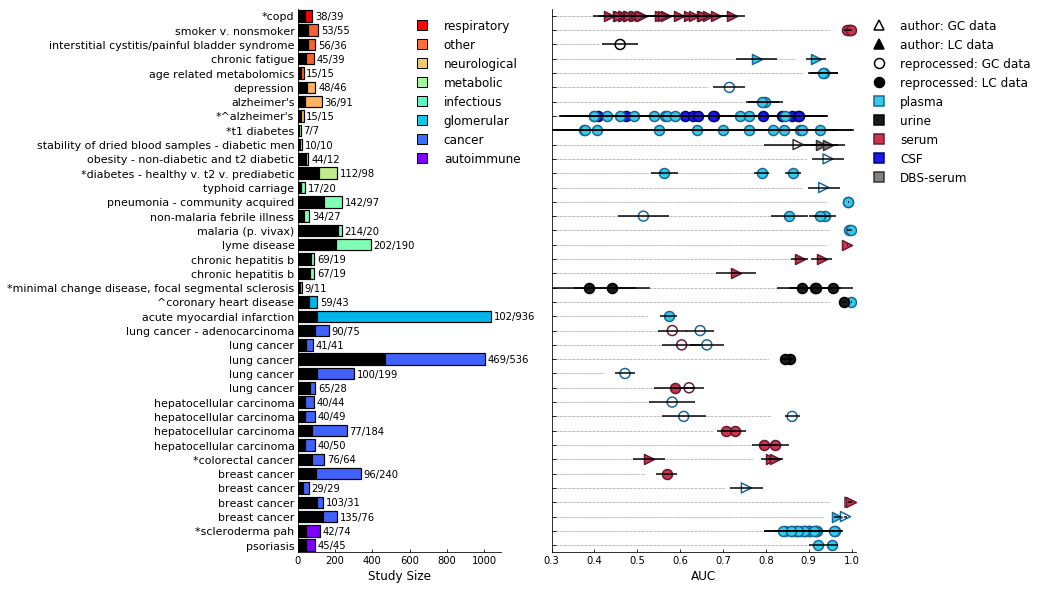

In [16]:
# plot all studies with individual datasets (ie not combined) and mapping on metadata. 
import matplotlib
import matplotlib.font_manager as font_manager

def get_edge_color(c):
    if c == (0.2,0.8,0.9):
        mod = np.asarray([-0.1,-0.4,-0.3])
    if c == (0.1,0.1,0.1):
        mod = np.asarray([-0.1,-0.1,-0.1])
    if c == (0.8,0.2,0.3):
        mod = np.asarray([-0.4,-0.1,-0.1])
    if c == (0.1,0.1,0.9):
        mod = np.asarray([-0.1,-0.1,-0.4])
    if c == (0.5,0.5,0.5):
        mod = np.asarray([-0.3,-0.3,-0.3])
    c = np.asarray(c)
    return tuple(c+mod)

def make_edge_colors(colors):
    new_colors = []
    for c in colors:
        new_colors.append(get_edge_color(c))
    return new_colors
    
def extract_info(single_disease_df, type_to_color):
    # get ys - SAME for all examples in one study
    y_mapper = {study:i+1 for i, study in enumerate(list(single_disease_df['study'].unique()))}
    ys = [y_mapper[study] for study in list(single_disease_df['study'])]
    # get xs - just the AUC values
    xs = list(single_disease_df['auc'])
    # x-error
    xs_err = list(single_disease_df['auc_std'])
    # get the shapes - o for reprocessed, ^ for author
    shapes = ['o' if ('XCMS' in name or 'IPO' in name or 'reprocessed' in name) else '>' for name in list(single_disease_df.analysis)]
    # get the colors - depends on sample type
    colors = [type_to_color[t] for t in list(single_disease_df.type)]
    # get fills - filled for LC, no fill for GC
    # either 'none' or the color of the sample type
    instru_type = list(single_disease_df.Instrument_category)
    fills = [color if instrument == 'LC' else 'none' for color, instrument in zip(colors, instru_type)]
    # get the labels - the specific disease
    single_disease_df_uni_study = single_disease_df.drop_duplicates(subset='study')
    labels = single_disease_df_uni_study.disease
    # get the disease category
    categories = single_disease_df.disease_type.unique()
    colors = make_edge_colors(colors)
    return xs, ys, xs_err, shapes, colors, fills, labels, categories

# map sample types (plasma etc) to a color
sample_types = list(select_dataset_summary.type.unique())
color_list = [(0.2,0.8,0.9), (0.1,0.1,0.1), (0.8,0.2,0.3), (0.1,0.1,0.9), (0.5,0.5,0.5), (0,1,1), (1,1,1)]
type_to_color = {sample:color_list[i] for i,sample in enumerate(sample_types)}

# sorting the data to get diseases next to each other and then subcategories (cancer types) together
dis_plot_df = select_dataset_summary.sort_values(by=['disease_type'])
dis_plot_df.disease = dis_plot_df.disease.str.lower()
types = fig_1a_df.disease_type.unique()
df_list = []
for dis_type in types:
    df_list.append(dis_plot_df[dis_plot_df.disease_type == dis_type].sort_values(by=['disease']))
dis_plot_df = pd.concat(df_list)
dis_plot_df = dis_plot_df.set_index('study')
# sort the df to match the order in the first figure:
order = list(fig_1a_df.study.unique())
dis_plot_df = dis_plot_df.loc[order]
dis_plot_df= dis_plot_df.reset_index()
# ok now i have a ful dataframe i can use to make the single plot in the same order as before

# plotting:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3]) 
ax = plt.subplot(gs[1])
ax2 = plt.subplot(gs[0])
# get all the data to plot:
xs, ys, xs_err, shapes, colors, fills, labels, categories = extract_info(dis_plot_df, type_to_color)

ax.get_yaxis().set_ticks([])
ax.set_xlim([0.3,1.01])
ax.set_ylim([0.5,ys[-1]+0.5])
ax.xaxis.set_ticks(np.arange(0.3, 1.1, 0.1))
ax.set_xlabel('AUC', fontname='Dejavu Sans', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(direction='in')

for x_,y_,xerr_,s_,c_,f_ in zip(xs,ys,xs_err,shapes,colors,fills):
    ax.scatter(x_, y_, marker=s_, s=100, alpha=1, linewidth=1.5, facecolors=f_, edgecolor=c_)
    ax.errorbar(x_,y_,xerr=xerr_,ecolor='k',elinewidth=1.5)
ax.yaxis.set_ticks(np.arange(1, len(labels)+1, 1))
ax.set_yticklabels([])

line_x,line_y = get_biggest_study_auc(xs,ys)
for x_, y_ in zip(line_x, line_y):
    ax.plot([0,x_-0.05],[y_,y_], 'k:', linewidth=0.5)

# make the bar plot:
p1 = ax2.barh(line_y, case, height=0.8, color='k', linewidth=1.2, edgecolor='k')
p2 = ax2.barh(line_y, control, left=case, height=0.8, color=bar_colors, linewidth=1.2, edgecolor='k')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks(np.arange(1, ys[-1]+1))
ax2.set_yticklabels(temp_y_labels, fontname='Dejavu Sans', fontsize=11)
# ax2.set_ylim([-2,y[-1]+2])
ax2.set_ylim([0.5,ys[-1]+0.5])
ax2.tick_params(direction='in', left='off')
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    tick.label.set_fontproperties('Dejavu Sans')
ax2.set_xlabel('Study Size', fontname='Dejavu Sans', fontsize=12)    
# put the case/control values on the plot    
for case_n, control_n, y_val in zip(case,control,np.arange(1, ys[-1]+1)):
    ax2.text(int(case_n)+int(control_n)+15, y_val-0.25, '{}/{}'.format(case_n,control_n), fontname='Dejavu Sans', fontsize=10)
    
# make legend:
legend_data = [['author: GC data', 'none', 'k', '^'],
               ['author: LC data', 'k', 'k', '^'],
               ['reprocessed: GC data', 'none', 'k', 'o'],
               ['reprocessed: LC data', 'k', 'k', 'o']]
for s_type in type_to_color:
    legend_data.append([s_type, type_to_color[s_type], get_edge_color(type_to_color[s_type]),'s'])
patches = []
for ele in legend_data:
    patches.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], markeredgewidth=1.5, label=ele[0], markersize=10))
    
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
lgd2 = ax2.legend(handles=patches_bar[4:], bbox_to_anchor=(0.5,1), frameon=False, prop=font) # bbox below other: (3.46, 0.685)
lgd = ax.legend(handles=patches, bbox_to_anchor=(1, 1), frameon=False, prop=font)
# plt.show()
plt.savefig('LR_Fig1_alt.eps', format='eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

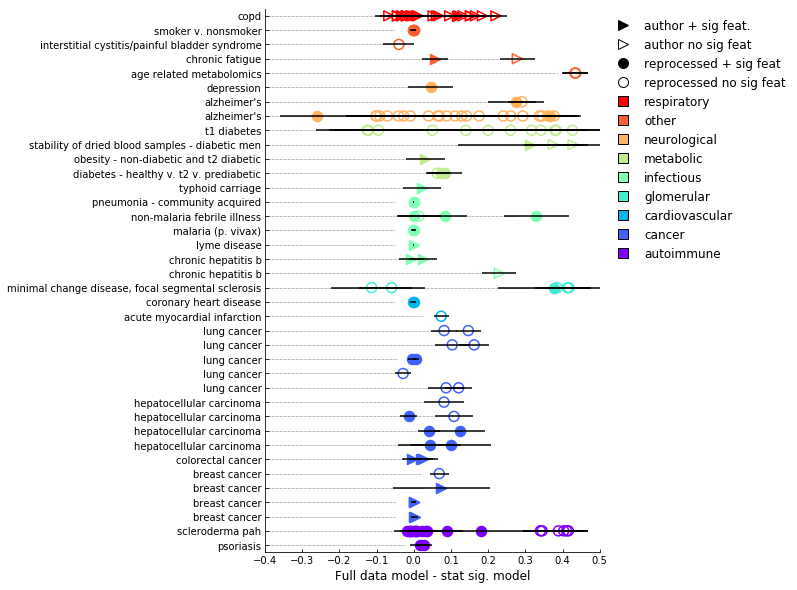

<Figure size 432x288 with 0 Axes>

In [55]:
# want to compare each of these plotted above with their equivalent if i had used a train/val/test split
# found stat sig features at 0.05 FDR and then made a model from that.
stat_sig_models = pd.read_csv('./1onlysigfeat_30avg_log_reg_auc_sigfeat_summary_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
# get them in the same order with the same studies....
comparison_df = dis_plot_df.copy()
stat_sig_models = stat_sig_models.set_index('analysis')
dis_plot_df_sorter = dis_plot_df.set_index('analysis')
order = dis_plot_df_sorter.index.tolist()
stat_sig_models = stat_sig_models.loc[order].reset_index()
study_auc_diff = dis_plot_df.auc - stat_sig_models.auc

# get the error of this: sqrt(E1**2 + E2**2)
statsig_error = np.square(stat_sig_models.auc_std)
ML_error = np.square(dis_plot_df.auc_std)
comparison_df['std_err_diff'] = np.sqrt(ML_error + statsig_error)
comparison_df['ML_minus_statsig'] = study_auc_diff
### THIS IS THE DIFFERENCE YOU WANT TO DO ALOT OF THE ANALYSIS FROM !!! PLOT LIKE OTHERS!


# comparing the combined with the non combined studies
def get_biggest_study_auc(xs,ys):
    x_line, y_line = [], []
    best_x_for_y = {i:0 for i in set(ys)}
    for x_, y_ in zip(xs,ys):
        if x_ > best_x_for_y[y_]:
            best_x_for_y[y_] = x_
    for k,v in sorted(best_x_for_y.items()):
        x_line.append(v)
        y_line.append(k)
    return x_line, y_line

def extract_info(single_disease_df, type_to_color):
    # get ys - SAME for all examples in one study
    y_mapper = {study:i+1 for i, study in enumerate(list(single_disease_df['study'].unique()))}
    ys = [y_mapper[study] for study in list(single_disease_df['study'])]
    # get xs - just the AUC values
    xs = list(single_disease_df['ML_minus_statsig'])
    # x-error
    xs_err = list(single_disease_df['std_err_diff'])
    # get the shapes - o for reprocessed, ^ for author
    shapes = ['o' if ('XCMS' in name or 'IPO' in name or 'reprocessed' in name) else '>' for name in list(single_disease_df.analysis)]
    # get the colors - depends on sample type
    colors = [type_to_color[t] for t in list(single_disease_df.disease_type)]
    # get fills - filled for LC, no fill for GC
    # either 'none' or the color of the sample type
    single_disease_df_aucs = list(stat_sig_models.auc)
    fills = [color if auc != 0.5 else 'none' for color, auc in zip(colors, single_disease_df_aucs)]
#     fills = [color if 'author' in name or 'reprocessed' in name else 'none' for color, name in zip(colors, list(single_disease_df.analysis))]
    # get the labels - the specific disease
    single_disease_df_uni_study = single_disease_df.drop_duplicates(subset='study')
    labels = single_disease_df_uni_study.disease
    # get the disease category
    categories = single_disease_df.disease_type.unique()
    return xs, ys, xs_err, shapes, colors, fills, labels, categories


# need the color of the marker - list of numbers where a number is the same for all disease_types
disease_types_unique = comparison_df.disease_type.unique()
color_fractions = {i:int(i)/(len(disease_types_unique)-1) for i in range(len(disease_types_unique))}
disease_types = list(comparison_df.disease_type)
disease_to_num = {disease:i for i,disease in enumerate(disease_types_unique)}
colors = [disease_to_num[disease] for disease in disease_types]
cmap = matplotlib.cm.get_cmap('rainbow')
# colors for legend
disease_to_color_legend = {disease:cmap(color_fractions[disease_to_num[disease]]) for disease in disease_to_num}
legend_data = [['author + sig feat.', 'k', 'k', '>'],
               ['author no sig feat', 'none', 'k', '>'],
               ['reprocessed + sig feat', 'k', 'k', 'o'],
               ['reprocessed no sig feat', 'none', 'k', 'o']]
for ele in sorted(disease_to_color_legend.keys(), reverse=True):
    legend_data.append([ele, disease_to_color_legend[ele], 'k','s'])
patches_bar = []
for ele in legend_data:
    patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=10))
    

fig = plt.figure(figsize=(6,10))
ax = plt.subplot()
# get all the data to plot:
xs, ys, xs_err, shapes, colors, fills, labels, categories = extract_info(comparison_df, disease_to_color_legend)
ax.get_yaxis().set_ticks([])
ax.set_xlim([-0.4,0.5])
ax.set_ylim([0.5,ys[-1]+0.5])
ax.xaxis.set_ticks(np.arange(-0.4, 0.6, 0.1))
ax.set_xlabel('Full data model - stat sig. model', fontname='Dejavu Sans', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(direction='in')

for x_,y_,xerr_,s_,c_,f_ in zip(xs,ys,xs_err,shapes,colors,fills):
    ax.scatter(x_, y_, marker=s_, s=100, alpha=1, linewidth=1.5, facecolors=f_, edgecolor=c_)
    ax.errorbar(x_,y_,xerr=xerr_,ecolor='k',elinewidth=1.5)
ax.yaxis.set_ticks(np.arange(1, len(labels)+1, 1))
ax.set_yticklabels(labels)

line_x,line_y = get_biggest_study_auc(xs,ys)
for x_, y_ in zip(line_x, line_y):
    ax.plot([-.4,x_-0.05],[y_,y_], 'k:', linewidth=0.5)
    
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
lgd = ax.legend(handles=patches_bar, bbox_to_anchor=(1, 1), frameon=False, prop=font)

plt.savefig('ML_v_statsig_model_performance.eps', format='eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.gcf().clear()


# # try plotting avg combined v avg not combined
# studies = comparison_df.study.unique()
# combined_auc = []
# not_combined_auc = []
# for study in studies:
#     study_df = comparison_df[comparison_df.study == study]
#     analysis = study_df.analysis
#     combined = []
#     not_combined = []
#     for a in analysis:
#         if 'reprocessed' in a or 'author' in a:
#             combined.append(list(study_df[study_df.analysis == a].auc)[0])
#         else:
#             not_combined.append(list(study_df[study_df.analysis == a].auc)[0])
#     combined = np.asarray(combined)
#     not_combined = np.asarray(not_combined)
#     combined_auc.append(combined.mean())
#     not_combined_auc.append(not_combined.mean())
# fig2 = plt.figure(figsize=(5,5))
# ax2 = plt.subplot()
# ax2.set_ylim([0.5,1])
# ax2.set_xlim([0.5,1])
# ax2.set_ylabel('Average combined study AUCs')
# ax2.set_xlabel('Average not combined AUCs')
# ax2.scatter(not_combined_auc, combined_auc)
# plt.savefig('ML_v_statsig_lineplot.eps', format='eps', dpi=1000)

This next cell is for the same thing, just for plotting the data horizontally as opposed to vertically....

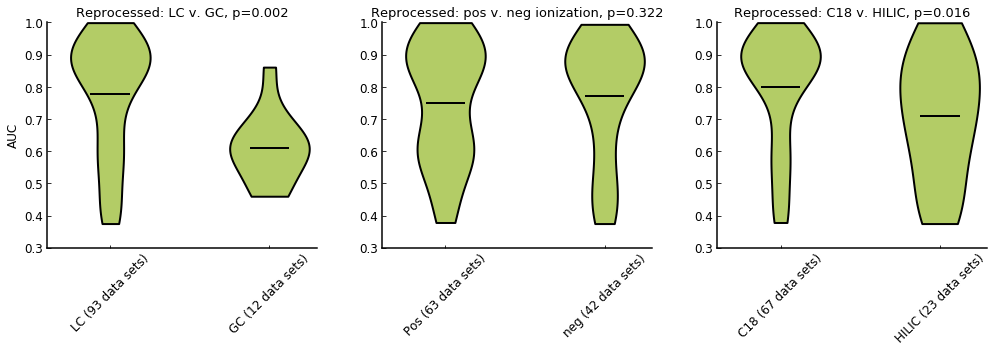

In [42]:
# MUST run the cell above...
# calc stat significance of the GC v LC and a few others. 
from scipy.stats import mannwhitneyu

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def set_plot_features(ax, parts):
    for pc in parts['bodies']:
        pc.set_facecolor((0.7, 0.8, 0.4, 0.9))
        pc.set_linewidth(2)
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    for partname in ['cmeans']:
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(direction='in')
    for tick in ax.get_yticklabels():
        tick.set_fontname("Dejavu Sans")
        tick.set_fontsize(12)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

original_multi_class = ['ST000284', 'ST000046', 'ST000045', 'ST000763', 'ST000329', 'MTBLS358', 'MTBLS352']
no_original_multi = False
if no_original_multi:
    for multi_study in original_multi_class:
        summary_w_auc = dis_plot_df[indiv_dis_plot_df['study']!=multi_study]
else:
    summary_w_auc = dis_plot_df
    
summary_w_auc = summary_w_auc.set_index('analysis')
# Looking at all the datasets together (comment out specific rows below)
indexes = list(summary_w_auc.index)
author = []
reprocessed = []
for ind in indexes:
    if 'IPO' in ind or 'XCMS' in ind or 'reprocessed' in ind:
        reprocessed.append(ind)
    else:
        author.append(ind)
analysis_type = 'All'
###### to look at just the author data use:
# summary_w_auc = summary_w_auc.loc[author]
# analysis_type = 'Author'

###### to look at just the reprocessed data use:
summary_w_auc = summary_w_auc.loc[reprocessed]
analysis_type = 'Reprocessed'

category = summary_w_auc.Instrument_category
column = summary_w_auc.column
# mode = summary_w_auc.mode
mode = summary_w_auc['mode'].replace({np.nan:'NaN'})



fig = plt.figure(figsize=(14,5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
ax = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
    
#look at LC v GC studies via violoin plot:
lc_auc = list(summary_w_auc[summary_w_auc.Instrument_category=='LC']['auc'])
gc_auc = list(summary_w_auc[summary_w_auc.Instrument_category=='GC']['auc'])
data = [lc_auc, gc_auc]
_, p = mannwhitneyu(lc_auc, gc_auc)
ax.set_xlim([0.6, 2.3])
ax.set_ylim([0.3,1])
ax.xaxis.set_ticks(np.arange(1, 3, 1))
parts = ax.violinplot(data, [1,2], widths=0.5, showmeans=True, showextrema=False)
#, labels=['LC (%.2f)'%lc_auc.mean(), 'GC (%.2f)'%gc_auc.mean()])
set_plot_features(ax, parts)
ax.set_title('{}: LC v. GC, p={:4.3f}'.format(analysis_type, p), fontname='Dejavu Sans', fontsize=13)
ax.set_xticklabels(['LC ({} data sets)'.format(len(lc_auc)), 'GC ({} data sets)'.format(len(gc_auc))], rotation=45, fontname='Dejavu Sans', fontsize=12)
ax.set_ylabel('AUC', fontname='Dejavu Sans', fontsize=12)
# plt.show()

# #look at pos v neg studies via violin plot:
pos_auc = summary_w_auc[summary_w_auc['mode']=='positive']['auc']
neg_auc = summary_w_auc[summary_w_auc['mode']=='negative']['auc']
_, p = mannwhitneyu(pos_auc, neg_auc)
data = [pos_auc, neg_auc]
ax1.set_xlim([0.6, 2.3])
ax1.set_ylim([0.3,1])
ax1.xaxis.set_ticks(np.arange(1, 3, 1))
parts = ax1.violinplot(data, [1,2], widths=0.5, showmeans=True, showextrema=False)
#, labels=['LC (%.2f)'%lc_auc.mean(), 'GC (%.2f)'%gc_auc.mean()])
set_plot_features(ax1, parts)
ax1.set_title('{}: pos v. neg ionization, p={:4.3f}'.format(analysis_type, p), fontname='Dejavu Sans', fontsize=13)
ax1.set_xticklabels(['Pos ({} data sets)'.format(len(pos_auc)), 'neg ({} data sets)'.format(len(neg_auc))], rotation=45, fontname='Dejavu Sans', fontsize=12)
# ax1.set_yticklabels([])
# ax1.set_ylabel('AUC', fontname='Dejavu Sans', fontsize=12)

#look at C18 v hilic studies via violin plot:
C18_auc = summary_w_auc[summary_w_auc['column']=='C18']['auc']
HILIC_auc = summary_w_auc[summary_w_auc['column']=='HILIC']['auc']
_, p = mannwhitneyu(C18_auc, HILIC_auc)
data = [C18_auc, HILIC_auc]
ax2.set_xlim([0.6, 2.3])
ax2.set_ylim([0.3,1])
ax2.xaxis.set_ticks(np.arange(1, 3, 1))
parts = ax2.violinplot(data, [1,2], widths=0.5, showmeans=True, showextrema=False)
#, labels=['LC (%.2f)'%lc_auc.mean(), 'GC (%.2f)'%gc_auc.mean()])
set_plot_features(ax2, parts)
ax2.set_title('{}: C18 v. HILIC, p={:4.3f}'.format(analysis_type, p), fontname='Dejavu Sans', fontsize=13)
ax2.set_xticklabels(['C18 ({} data sets)'.format(len(C18_auc)), 'HILIC ({} data sets)'.format(len(HILIC_auc))], rotation=45, fontname='Dejavu Sans', fontsize=12)
# ax2.set_yticklabels([])
# ax2.set_ylabel('AUC', fontname='Dejavu Sans', fontsize=12)

plt.tight_layout()
plt.savefig('RF_{}_conditions.eps'.format(analysis_type), format='eps', dpi=1000, bbox_inches='tight')
plt.show()

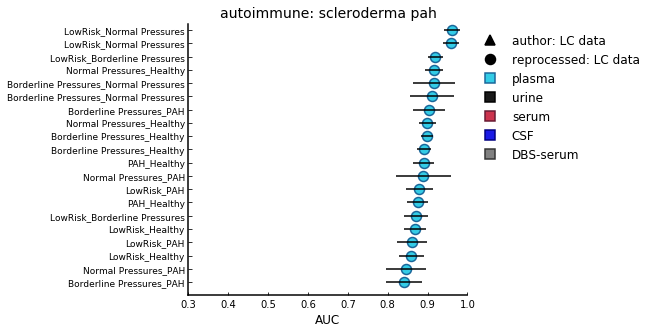

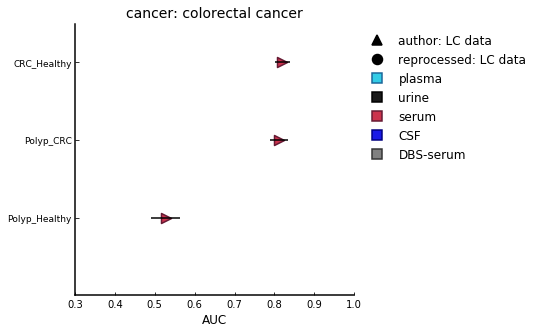

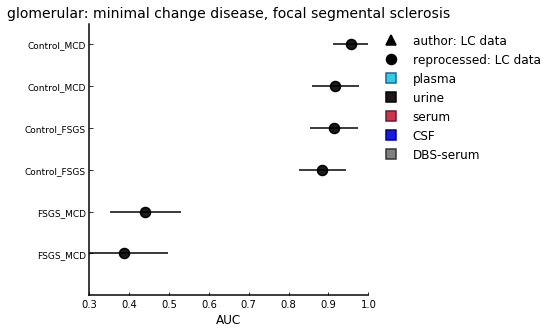

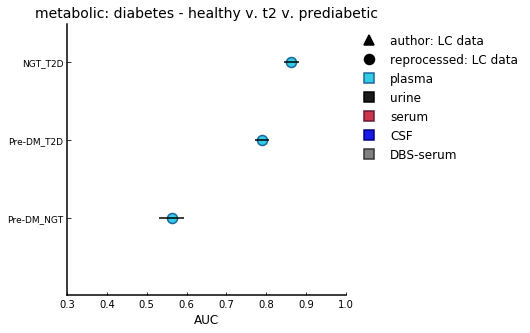

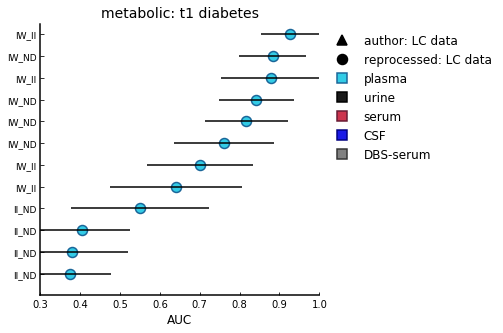

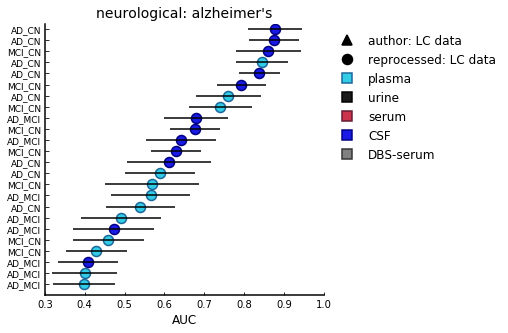

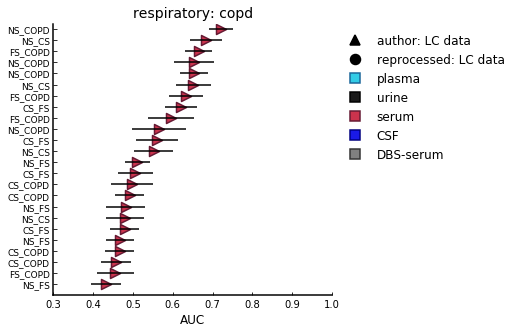

In [9]:
# looking at and plotting diseases independently with mapping the o-v-o labels

def extract_info(single_disease_df, type_to_color):
    # get xs - just the AUC values
    xs = list(single_disease_df['auc'])
    # get ys - SAME for all examples in one study
    ys = [i+1 for i in range(len(xs))]
    # x-error
    xs_err = list(single_disease_df['auc_std'])
    # get the shapes - o for reprocessed, ^ for author
    shapes = ['o' if ('XCMS' in name or 'IPO' in name or 'reprocessed' in name) else '>' for name in list(single_disease_df.analysis)]
    # get the colors - depends on sample type
    colors = [type_to_color[t] for t in list(single_disease_df.type)]
    # get fills - filled for LC, no fill for GC
    # either 'none' or the color of the sample type
    instru_type = list(single_disease_df.Instrument_category)
    fills = [color if instrument == 'LC' else 'none' for color, instrument in zip(colors, instru_type)]
    # get the labels - the specific disease
    labels = list(single_disease_df.analysis)
    labels = [data.split('_')[-1]+'_'+data.split('_')[-2] for data in labels]
    single_disease_df_uni_study = single_disease_df.drop_duplicates(subset='study')
    disease = list(single_disease_df_uni_study.disease)[0]
    category = single_disease_df.disease_type.unique()[0]
    colors = make_edge_colors(colors)
    return xs, ys, xs_err, shapes, colors, fills, labels, category, disease

def combine_sort_return(xs, ys, xerrs, shapes, colors, fills, labels):
    combined = zip(xs, ys, xerrs, shapes, colors, fills, labels)
    combined = sorted(combined, key=lambda tup: tup[0])
    xs, ys, xerrs, shapes, colors, fills, labels = list(zip(*combined))
    return xs, sorted(ys), xerrs, shapes, colors, fills, labels

sample_types = list(select_dataset_summary.type.unique())
color_list = [(0.2,0.8,0.9), (0.1,0.1,0.1), (0.8,0.2,0.3), (0.1,0.1,0.9), (0.5,0.5,0.5), (0,1,1), (1,1,1)]
type_to_color = {sample:color_list[i] for i,sample in enumerate(sample_types)}

o_v_o = ['MTBLS352','MTBLS358','ST000045', 'ST000046', 'ST000284', 'ST000329', 'ST000763']
ovo_df = dis_plot_df[dis_plot_df.study.isin(o_v_o)] 
ovo_studies = ovo_df.study.unique()
for study in ovo_studies:
    temp_df = ovo_df[ovo_df.study == study]
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot()
    xs, ys, xs_err, shapes, colors, fills, labels, category, disease = extract_info(temp_df, type_to_color)
    xs, ys, xs_err, shapes, colors, fills, labels = combine_sort_return(xs, ys, xs_err, shapes, colors, fills, labels)
    for x_,y_,xerr_,s_,c_,f_ in zip(xs,ys,xs_err,shapes,colors,fills):
        ax.scatter(x_, y_, marker=s_, s=100, alpha=1, linewidth=1.5, facecolors=f_, edgecolor=c_)
        ax.errorbar(x_,y_,xerr=xerr_,ecolor='k',elinewidth=1.5)
    ax.set_title('{}: {}'.format(category, disease), fontname='Dejavu Sans', fontsize=14)
    ax.set_xlabel('AUC', fontname='Dejavu Sans', fontsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(direction='in')
    ax.set_xlim([0.3,1])
    ax.set_ylim([0,len(ys)+0.5])
    ax.yaxis.set_ticks(np.arange(1, ys[-1]+1))
    ax.set_yticklabels(labels, fontname='Dejavu Sans', fontsize=9)
    # make the legend
    legend_data = [['author: LC data', 'k', 'k', '^'],['reprocessed: LC data', 'k', 'k', 'o']]
    for s_type in type_to_color:
        legend_data.append([s_type, type_to_color[s_type], get_edge_color(type_to_color[s_type]),'s'])
    patches = []
    for ele in legend_data:
        patches.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], markeredgewidth=1.5, label=ele[0], markersize=10))
    font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
    lgd = ax.legend(handles=patches,bbox_to_anchor=(1, 1), frameon=False, prop=font)
#     plt.tight_layout()
    plt.savefig('RF_{}-{}.eps'.format(category, disease), format='eps', dpi=1000, bbox_inches='tight')
    plt.show()

In [ ]:
# combined v not combined differences 


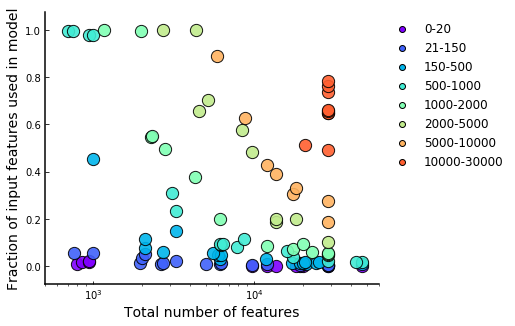

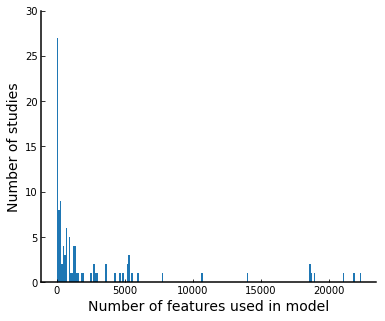

In [79]:
def scatterplot(xs, ys, ss, cs, ls, sscale=1, sbins=None):
    ax = plt.gca()
    cm = plt.get_cmap('rainbow')
    for i, c in enumerate(cs.unique()):
        ax.scatter(xs[cs==c],
                    ys[cs==c],
                    s=ss*sscale if isinstance(ss,int) else ss[cs==c]*sscale,
                    c=cm(1.*i/len(cs.unique())),
                    edgecolor='k',
                    alpha=0.9,
                    vmin=0, vmax=len(cs.unique()),
                   label='_nolegend_')
        ax.scatter([],[],c=cm(1.*i/len(cs.unique())),edgecolor='k',label=c)
    ax.scatter([],[],marker='None',label=' ')
    if not isinstance(ss,int):
        for s in sbins:
            ax.scatter([],[],c='k',edgecolor='k',s=s*sscale,label=str(s))
            ax.scatter([],[],marker='None',label=' ')
#     for x, y, l in zip(xs, ys, ls):
#         ax.text(x, y, l, color='k', ha='center', va='center')
    ax.set_xlabel(xs.name)
    ax.set_ylabel(ys.name)
    font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
    ax.legend(bbox_to_anchor=(1, 1),frameon=False, prop=font)
#     ax.grid()
def find_bin(number):
    bins = [(0,20), (21,150), (150,500), (500,1000), (1000,2000), (2000,5000), (5000,10000), (10000,30000)]
    for bin_range in bins:
        if number >= bin_range[0] and number <= bin_range[1]:
            return str(bin_range[0])+'-'+str(bin_range[1])


summary_w_auc = dis_plot_df.set_index('analysis')
indexes = list(summary_w_auc.index)    
author = []
reprocessed = []
for ind in indexes:
    if 'IPO' in ind or 'XCMS' in ind or 'reprocessed' in ind:
        reprocessed.append(ind)
    else:
        author.append(ind)
summary_w_auc = summary_w_auc.loc[reprocessed]
summary_w_auc.sort_values('model_nonzero_coef', inplace=True)
# bins: 0-20, 20-150, 150-500, 500-1000, 1000-2000, 2000-5000, 5000-10000, 10000-30000
model_sizes = list(summary_w_auc.model_nonzero_coef)
model_sizes = [find_bin(size) for size in model_sizes]
summary_w_auc['sizes'] = model_sizes
fig, ax1 = plt.subplots(1,1,figsize=(6,5))
# ax1.set_xlim([1,5e4])
# ax1.set_ylim([1,4000])
# print(fig_1a_df.model_nonzero_coef)
scatterplot(summary_w_auc.features,
                summary_w_auc.model_nonzero_coef/summary_w_auc.features,
                150,
                summary_w_auc.sizes,
                list(range(summary_w_auc.shape[0])))
ax1.set_xlabel('Total number of features', fontname='Dejavu Sans', fontsize=14)
ax1.set_xscale('log')
ax1.set_xlim([500,60000])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.tick_params(direction='in')
# ax1.set_yscale('log')
ax1.set_ylabel('Fraction of input features used in model', fontname='Dejavu Sans', fontsize=14)
plt.savefig('LR_fract-feat_v_total-feat.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.show()

fig, ax1 = plt.subplots(1,1,figsize=(6,5))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.tick_params(direction='in')
plt.hist(summary_w_auc.model_nonzero_coef, bins=200)
plt.ylabel('Number of studies',fontname='Dejavu Sans', fontsize=14)
plt.xlabel('Number of features used in model',fontname='Dejavu Sans', fontsize=14)
# plt.xscale('log')
plt.ylim([0,30])
plt.savefig('LR_histo_number-feat-sed.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.show()

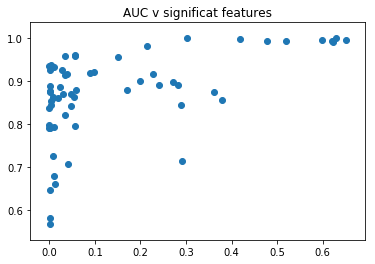

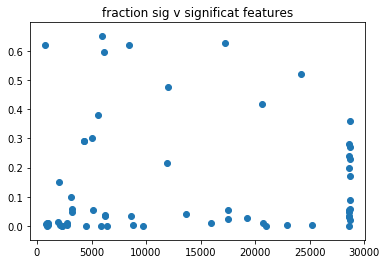

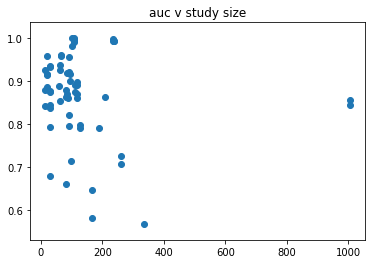

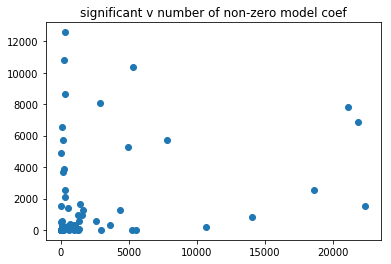

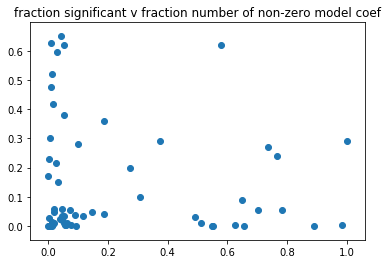

In [280]:
# this cell is to look at the features of the reprocessed data sets. 
# auc v. number of features
# auc v. prop sig v number sig features 
reproc_ds = list(dis_plot_df.analysis)
reproc_ds = [ds for ds in reproc_ds if 'IPO' in ds or 'XCMS' in ds]
reproc_df = dis_plot_df[dis_plot_df.analysis.isin(reproc_ds)]
reproc_df = reproc_df.loc[reproc_df['significant'] != 0]
ys = reproc_df.auc
xs = reproc_df.significant/reproc_df.features
plt.scatter(xs,ys)
plt.title('AUC v significat features')
plt.show()

ys = reproc_df.significant/reproc_df.features
xs = reproc_df.features
plt.scatter(xs,ys)
plt.title('fraction sig v significat features')
plt.show()

ys = reproc_df.auc
xs = reproc_df.samples
plt.scatter(xs,ys)
plt.title('auc v study size')
plt.show()

ys = reproc_df.significant
xs = reproc_df.model_nonzero_coef
plt.scatter(xs,ys)
plt.title('significant v number of non-zero model coef')
plt.show()

ys = reproc_df.significant/reproc_df.features
xs = reproc_df.model_nonzero_coef/reproc_df.features
plt.scatter(xs,ys)
plt.title('fraction significant v fraction number of non-zero model coef')
plt.show()
# reproc_df


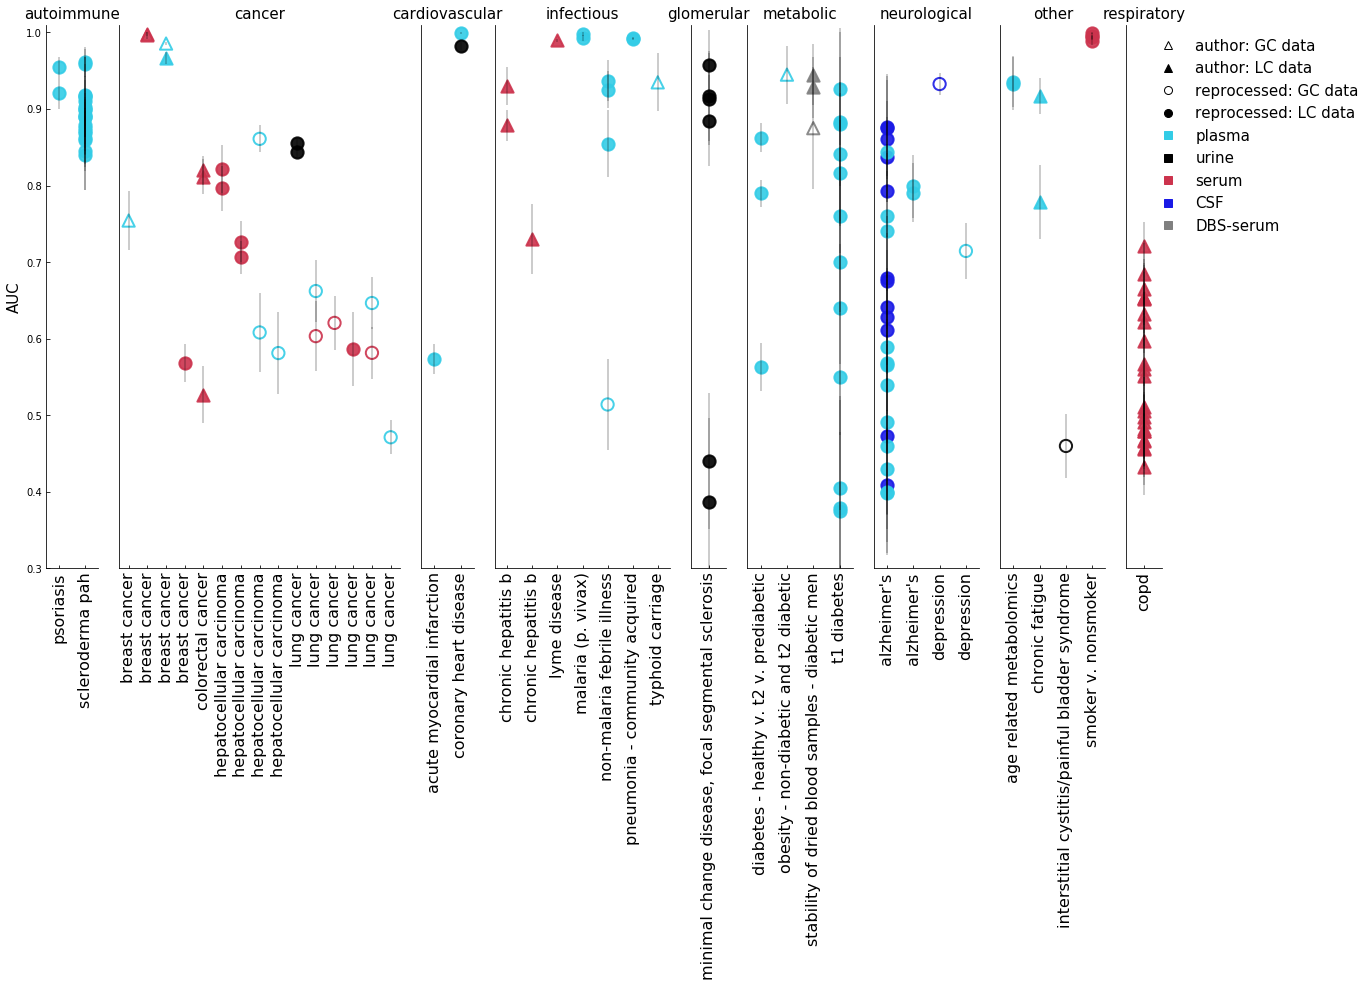

In [150]:
# what are we plotting:
# for each disease a nice plot of all the data sorted 
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib import gridspec

def extract_info(single_disease_df, type_to_color):
    # get xs - SAME for all examples in one study
    x_mapper = {study:i+1 for i, study in enumerate(list(single_disease_df['study'].unique()))}
    xs = [x_mapper[study] for study in list(single_disease_df['study'])]
    # get ys - just the AUC values
    ys = list(single_disease_df['auc'])
    # y-error
    ys_err = list(single_disease_df['auc_std'])
    # get the shapes - o for reprocessed, ^ for author
    shapes = ['o' if ('XCMS' in name or 'IPO' in name or 'reprocessed' in name) else '^' for name in list(single_disease_df.analysis)]
    # get the colors - depends on sample type
    colors = [type_to_color[t] for t in list(single_disease_df.type)]
    # get fills - filled for LC, no fill for GC
    # either 'none' or the color of the sample type
    instru_type = list(single_disease_df.Instrument_category)
    fills = [color if instrument == 'LC' else 'none' for color, instrument in zip(colors, instru_type)]
    # get the labels - the specific disease
    single_disease_df_uni_study = single_disease_df.drop_duplicates(subset='study')
    labels = single_disease_df_uni_study.disease
    # get the disease category
    category = single_disease_df.disease_type.unique()[0]
    return xs, ys, ys_err, shapes, colors, fills, labels, category

sample_types = list(select_dataset_summary.type.unique())
color_list = [(0.2,0.8,0.9), (0,0,0), (0.8,0.2,0.3), (0.1,0.1,0.9), (0.5,0.5,0.5), (0,1,1), (1,1,1)]
type_to_color = {sample:color_list[i] for i,sample in enumerate(sample_types)}

# plotting:
# make a new subplot for every disease 
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(1, 9, width_ratios=[1.5,8,1.5,5,1,3,3,3,1]) 
ax0 = plt.subplot(gs[0])
ax0.set_ylim([0.3,1])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])
ax4 = plt.subplot(gs[4])
ax5 = plt.subplot(gs[5])
ax6 = plt.subplot(gs[6])
ax7 = plt.subplot(gs[7])
ax8 = plt.subplot(gs[8])

# o_v_o = ['MTBLS352','MTBLS358','ST000045', 'ST000046', 'ST000284', 'ST000329', 'ST000763']
# study_spec = {study:'' for study in list(summary_w_metadata.study.unique())}
# for study in o_v_o:
#     study_spec[study] += '*'
# for study in not_combined:
#     study_spec[study] += '^'
    
# sorting the data to get diseases next to each other and then subcategories (cancer types) together
indiv_dis_plot_df = select_dataset_summary.sort_values(by=['disease_type'])
indiv_dis_plot_df.disease = indiv_dis_plot_df.disease.str.lower()
types = ['autoimmune', 'cancer', 'cardiovascular', 'infectious', 'glomerular',
         'metabolic', 'neurological', 'other', 'respiratory']
df_list = []
axis = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for ax in axis:
    ax.get_yaxis().set_ticks([])
    
    ax.set_ylim([0.3,1.01])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

for dis_type, ax in zip(types, axis):
    disease_data = indiv_dis_plot_df[indiv_dis_plot_df.disease_type == dis_type].sort_values(by=['disease'])
    xs, ys, ys_err, shapes, colors, fills, labels, category = extract_info(disease_data, type_to_color)
    ax.set_xlim([0.5,xs[-1]+0.5])
    for x_,y_,yerr_,s_,c_,f_ in zip(xs,ys,ys_err,shapes,colors,fills):
        ax.scatter(x_, y_, marker=s_, s=150, alpha=0.9, linewidth=2, facecolors=f_, edgecolor=c_)
        ax.errorbar(x_,y_,yerr=yerr_,ecolor='k',elinewidth=0.4)
    ax.set_title(category, fontname='Dejavu Sans', fontsize=15)
    ax.xaxis.set_ticks(np.arange(1, len(labels)+1, 1))
    ax.set_xticklabels(labels, rotation=90, fontname='Dejavu Sans', fontsize=16)
    ax.tick_params(direction='in')
ax0.yaxis.set_ticks(np.arange(0.3, 1.1, 0.1))
ax0.set_ylabel('AUC', fontname='Dejavu Sans', fontsize=15)
ax1.set_xlim([0.5,15.5])


# make legend:
legend_data = [['author: GC data', 'none', 'k', '^'],
               ['author: LC data', 'k', 'k', '^'],
               ['reprocessed: GC data', 'none', 'k', 'o'],
               ['reprocessed: LC data', 'k', 'k', 'o']]
for s_type in type_to_color:
    legend_data.append([s_type, type_to_color[s_type], type_to_color[s_type],'s'])
patches = []
for ele in legend_data:
    patches.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=8))
    

font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=15)
lgd = ax.legend(handles=patches, bbox_to_anchor=(7, 1), frameon=False, prop=font)
# plt.show()
plt.savefig('Fig2.eps', format='eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [406]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

original_multi_class = ['ST000284', 'ST000046', 'ST000045', 'ST000763', 'ST000329', 'MTBLS358', 'MTBLS352']

def get_index_and_shape(x, name):
    if 'XCMS' in name or 'IPO' in name:
        return x, 'o'
    else:
        return x, 'd'

def get_metadata(df,metadata_lab):
    if metadata_lab == 'type':
        return list(df.type)
    elif metadata_lab == 'column':
        return list(df.column)
    elif metadata_lab == 'mode':
        return list(df['mode'])
    elif metadata_lab.lower() == 'instrument_category':
        return list(df.Instrument_category)
    
def metadata_mapper(df, metadata_lab):
    data = get_metadata(df, metadata_lab)
    data_set = set(data)
    mapping = {}
    for i, ele in enumerate(data_set):
        mapping[ele] = i
    print(mapping)
    return mapping

def get_legend(fill_mapper, color_mapper):
    inv_fill = dict((v,k) for k, v in fill_mapper.items())
    inv_color = dict((v,k) for k, v in color_mapper.items())
    # for the following objects: its the [name, fill type, color, shape]
    data = [['author data', 'k', 'k', 'd'],
            ['reprocessed data', 'k', 'k', 'o'],
            [inv_fill[0], 'none', 'k', 's'],
            [inv_fill[1], 'k', 'k', 's']]
    for ele in inv_color:
        data.append([inv_color[ele],colors[ele], colors[ele], 's'])
    return data

def plot_legend(x, legend_data):
    patches = []
    for ele in legend_data:
        patches.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0]))
    plt.legend(handles=patches, bbox_to_anchor=(1, 1))
    
def df_no_multi(df, no_original_multi=False, omc=original_multi_class):
    if no_original_multi:
        for multi_study in omc:
            df = df[df['study']!=multi_study]
    return df

def filter_df(df, mode):
    df_copy = df.copy()
    if mode == 'reprocessed':
        keep_files = [f for f in list(df_copy.index) if 'IPO' in df_copy['analysis'].loc[f] or 'XCMS' in df_copy['analysis'].loc[f]]
    else:
        keep_files = [f for f in list(df_copy.index) if 'IPO' not in df_copy['analysis'].loc[f] and 'XCMS' not in df_copy['analysis'].loc[f]]
    return df_copy.loc[keep_files]

In [407]:
out_path = './instrument_column/' 
fill_feat = 'instrument_category'
color_feat = 'type' #use this or column, mode, instrument_category, type

s_w_m = summary_w_metadata

no_original_multi = False
s_w_m = df_no_multi(s_w_m, no_original_multi)
    
colors = [(1, 0, 0), (0,1,0), (0,0,1), (0.5,0.5,0), (0,1,1), (1,0,1), 
          (0.5,0.5,0.5), (0.1, 0.2, 0.5), (0.9, 0.2, 0.5), (0.5, 0.9, 0.5), (0.3, 0.5, 0.7)]
    
# want to plot multiple things at once:
# 1) a binary type feature (GC v LC or + v - which will be the fill v. no fill option)
# 2) any other feature - column type, gc/lc, +/-, serum/plasma/CSF
#### This first option will be the fill setting.
fill_mapper = metadata_mapper(s_w_m, fill_feat)  
#### This second option will be the over all color
color_mapper = metadata_mapper(s_w_m, color_feat)    
# these next two lines are for getting the labels and location for the labels for plotting of the classes                                                                                  
group_locations = []
diseases = []

legend_data = get_legend(fill_mapper, color_mapper)

disease_types = set(s_w_m.disease_type) # get the general disease types ...
for d in disease_types:
    x = 0 # since each plot is its own...
    fig, ax1 = plt.subplots(1,1,figsize=(8,6))
    plt.title(d)
#     group_locations.append(x)
    df_dis = s_w_m.loc[s_w_m['disease_type']==d] # actually subset the data for just the disease of interest
    # get all the disease to be lower case for sorting
    disease = list(df_dis.disease)
    disease = [ele.lower() for ele in disease]
    df_dis['disease'] = disease
#     df_dis = df_dis.sort_values(by=['disease'])
    df_dis = df_dis.sort_values(by=['study'])
    if d == 'cancer':
        if not no_original_multi:
            studies = ['MTBLS17', 'MTBLS19', 'ST000865','MTBLS105', 'MTBLS28', 'ST000385','ST000388',
                       'ST000389','ST000392','ST000396','MTBLS92','ST000355','ST000356', 'ST000918','ST000284']
        else:
            studies = ['MTBLS17', 'MTBLS19', 'ST000865','MTBLS105', 'MTBLS28', 'ST000385','ST000388',
                       'ST000389','ST000392','ST000396','MTBLS92','ST000355','ST000356', 'ST000918']
    else:
        studies = set(df_dis.study)  
    for s in studies:
        # get just the single study data. 
        df = df_dis.loc[df_dis['study']==s]
        # since there is a study we will increase the x counter ie to move where we are plotting over 1
        x += 25
        datasets = list(df.analysis)
        datasets_auc = list(df.auc)
        dataset_auc_err = list(df.auc_std)
        # get the feature for color:
        dataset_metadata = get_metadata(df, color_feat)
        dataset_metadata = [color_mapper[ele] for ele in dataset_metadata]
        # get the feature for fill type
        fill_no_fill = get_metadata(df,fill_feat)
        fill_no_fill = [fill_mapper[ele] for ele in fill_no_fill]
        
        plt.text(x, 0.18, list(df.disease)[0], rotation=90)
#         plt.text(x-1,0.22, str(list(df.samples)[0])+'({})'.format(list(df.number_labels)[0]))
        plt.text(x-.4,0.26, str(list(df.samples)[0]), rotation=90, fontsize=14)
        # note probably a good idea to write this as a single vector plot instead each individually
        for ele, auc, auc_std, meta, fill in zip(datasets, datasets_auc, dataset_auc_err, dataset_metadata, fill_no_fill):
            ind, shape = get_index_and_shape(x, ele)
            if ind != x:
                new_x = ind
            else:
                new_x = x
            if fill == 0:
                fill = 'none'
            else:
                fill = colors[meta]
            plt.scatter(ind, auc, facecolors=fill, edgecolors=colors[meta], s=100, marker=shape)
            plt.errorbar(ind, auc, yerr=auc_std, ecolor='k', elinewidth=0.4)
        x = new_x
    plt.tick_params(
        axis='x',       
        which='both',   
        bottom=False,      
        top=False,         
        labelbottom=False)
#     for ele, disease in zip(group_locations,diseases):
#         plt.text(ele,0.18, disease, rotation=90)
    plt.ylabel('AUC')
    plt.ylim([0.2,1])
    plot_legend(x, legend_data)
#     plt.tight_layout()
#     plt.savefig(out_path+d, bbox_inches='tight')
#     plt.gcf().clear()
    plt.show()
    

AttributeError: 'DataFrame' object has no attribute 'Instrument_category'

In [68]:
# read in the data file you want to work with:
summary_w_metadata = pd.read_csv('rf_auc_sigfeat_summary_YES_bn_NO_log_NO_standscal_NO_multi_mapped_labels_YES_meta.csv')
lr_combined_ds = pd.read_csv('log_reg_combined_ds_summary.csv')
rf_combined_ds = pd.read_csv('rf_combined_ds_summary.csv')
lr_combined_ds

,Unnamed: 0,analysis,auc,auc_std,case,control,disease,features,label,model_nonzero_coef,number_labels,samples,single_ds_aucs,study,test_size,train_size
0,0,reprocessed_IPO_aligned_MTBLS105_qMS,0.927500,0.032016,40,49,Hepatocellular carcinoma,2031,a0,17,2,89,"[0.5442253824606765, 0.8578296703296703]",MTBLS105,17,72
1,1,reprocessed_IPO_aligned_MTBLS17_neg_exp1,0.707117,0.059810,59,129,hepatocellular carcinoma,30443,b0,3694,2,188,"[0.6828233374133007, 0.6806201550387597]",MTBLS17,36,152
2,2,reprocessed_IPO_aligned_MTBLS17_neg_exp2,0.646667,0.166467,13,50,hepatocellular carcinoma,48752,b1,182,2,63,"[0.42616421568627455, 0.6780637254901961]",MTBLS17,12,51
3,3,reprocessed_IPO_aligned_MTBLS17_neg_exp3,1.000000,0.000000,5,5,hepatocellular carcinoma,4721,b2,829,2,10,"[0.9166666666666666, 0.75]",MTBLS17,2,8
4,4,reprocessed_IPO_aligned_MTBLS17_neg_onebatch,0.737005,0.051718,77,184,hepatocellular carcinoma,34420,b3,31603,2,261,"[0.6700831197711156, 0.7169862642205317]",MTBLS17,51,210
5,5,author_Peaklist_EXP1_POS,0.662564,0.097852,59,129,hepatocellular carcinoma,2527,b4,2502,2,188,"[0.6448592411260711, 0.6087923296613628]",MTBLS17,36,152
6,6,author_Peaklist_EXP2_POS,0.636667,0.180862,13,50,hepatocellular carcinoma,4439,b5,470,2,63,"[0.6338848039215687, 0.6695465686274511]",MTBLS17,12,51
7,7,author_Peaklist_EXP3_POS,0.800000,0.400000,5,5,hepatocellular carcinoma,1003,b6,60,2,10,"[0.75, 0.9166666666666666]",MTBLS17,2,8
8,8,author_Exp1F_POS,0.780000,0.174929,20,25,hepatocellular carcinoma,2409,c0,8,2,45,"[0.8558201058201057, 0.7903439153439153]",MTBLS19,9,36
9,9,author_Exp2F_POS,0.780000,0.074833,20,25,hepatocellular carcinoma,2367,c1,1509,2,45,"[0.8687169312169312, 0.7619047619047619]",MTBLS19,9,36


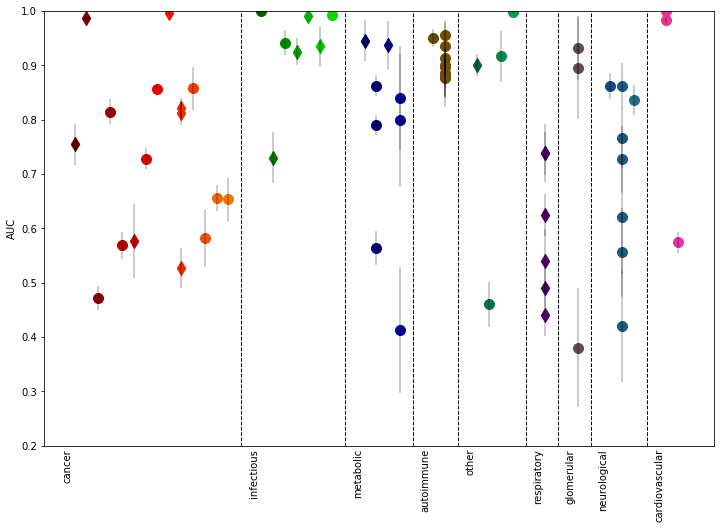

In [403]:
s_w_m = summary_w_metadata

no_original_multi = False
s_w_m = df_no_multi(s_w_m, no_original_multi)
# print(s_w_m)

disease_types = set(s_w_m.disease_type)
x = 0
c = 0
colors = [(0.3, 0, 0), (0,0.3,0), (0,0,0.3), (0.3,0.3,0), (0,0.3,0.3), (0.3,0,0.3), (0.3,0.3,0.3), (0.1, 0.2, 0.5), (0.9, 0.2, 0.5)]
# these next two lines are for getting the labels and location for the labels for plotting of the classes                                                                                  
group_locations = []
diseases = []
fig, ax1 = plt.subplots(1,1,figsize=(12,8))
for d in disease_types:
    diseases.append(d)
    if x == 0:
        pass
    else:
        plt.axvline(x=x+110, color='k', linewidth=1, linestyle='--')
        x += 175
    group_locations.append(x)
    df_dis = s_w_m.loc[s_w_m['disease_type']==d]
    df_dis = df_dis.sort_values(by=['study'])
    studies = set(df_dis.study)
    s = 0

    if df_dis.shape[0] > 20:
        c_step = 0.04
    else:
        c_step = 0.08
    
    for s in studies:
        # get just the single study data. 
        df = df_dis.loc[df_dis['study']==s]
        # since there is a study we will increase the x counter ie to move where we are plotting over 1
        x += 100
        datasets = list(df.analysis)
        datasets_auc = list(df.auc)
        dataset_auc_err = list(df.auc_std)
        
        c_ind = c % 3 
        color = list(colors[c])
        if color[c_ind] + c_step > 1.0:
            c_ind += 1
            if c_ind == 3:
                c_ind = 1
        color[c_ind] += c_step
        color = tuple(color)
        colors[c] = color
        
        for ele, auc, auc_std in zip(datasets, datasets_auc, dataset_auc_err):
            ind, shape = get_index_and_shape(x, ele)
            if ind != x:
                new_x = ind
            else:
                new_x = x
            plt.scatter(ind, auc, c=colors[c], s=100, marker=shape)
            plt.errorbar(ind, auc, yerr=auc_std, ecolor='k', elinewidth=0.4)
        x = new_x
    c += 1
plt.tick_params(
    axis='x',       
    which='both',   
    bottom=False,      
    top=False,         
    labelbottom=False)
for ele, disease in zip(group_locations,diseases):
    plt.text(ele,0.18, disease, rotation=90)
plt.ylabel('AUC')
plt.ylim([0.2,1])
plt.show()
    

In [6]:
# THIS IS LESS USEFUL, JUST USE THE OTHER 2

# s_w_m = summary_w_metadata[summary_w_metadata.number_labels == 2]
   
# no_original_multi = True
# s_w_m = df_no_multi(s_w_m, no_original_multi)
    
# disease_types = set(s_w_m.disease_type)
# x = 0
# c = 0
# colors = [(0.3, 0, 0), (0,0.3,0), (0,0,0.3), (0.3,0.3,0), (0,0.3,0.3), (0.3,0,0.3), (0.3,0.3,0.3), (0.1, 0.2, 0.5), (0.9, 0.2, 0.5)]
# # these next two lines are for getting the labels and location for the labels for plotting of the classes                                                                                  
# group_locations = []
# diseases = []

# for d in disease_types:
#     x = 0
#     fig, ax1 = plt.subplots(1,1,figsize=(8,6))
#     plt.title(d)
# #     group_locations.append(x)
#     df_dis = s_w_m.loc[s_w_m['disease_type']==d]
    
#     disease = list(df_dis.disease)
#     disease = [ele.lower() for ele in disease]
#     df_dis['disease'] = disease
# #     df_dis = df_dis.sort_values(by=['disease'])
#     df_dis = df_dis.sort_values(by=['study'])
#     if d == 'cancer':
#         if not no_original_multi:
#             studies = ['MTBLS17', 'MTBLS19', 'ST000865','MTBLS105', 'MTBLS28', 'ST000385','ST000388',
#                        'ST000389','ST000392','ST000396','MTBLS92','ST000355','ST000356', 'ST000918','ST000284']
#         else:
#             studies = ['MTBLS17', 'MTBLS19', 'ST000865','MTBLS105', 'MTBLS28', 'ST000385','ST000388',
#                        'ST000389','ST000392','ST000396','MTBLS92','ST000355','ST000356', 'ST000918']
#     else:
#         studies = set(df_dis.study)
#     s = 0

#     if df_dis.shape[0] > 20:
#         c_step = 0.04
#     else:
#         c_step = 0.08
    
#     for s in studies:
#         # get just the single study data. 
#         df = df_dis.loc[df_dis['study']==s]
#         # since there is a study we will increase the x counter ie to move where we are plotting over 1
#         x += 25
#         datasets = list(df.analysis)
#         datasets_auc = list(df.auc)
#         dataset_auc_err = list(df.auc_std)
#         plt.text(x, 0.18, list(df.disease)[0], rotation=90)
#         plt.text(x-1,0.22, str(list(df.samples)[0])+'({})'.format(list(df.number_labels)[0]))
        
#         c_ind = c % 3 
#         color = list(colors[c])
#         color[c_ind] += c_step
#         color = tuple(color)
#         colors[c] = color
        
#         for ele, auc, auc_std in zip(datasets, datasets_auc, dataset_auc_err):
#             ind, shape = get_index_and_shape(x, ele)
#             if ind != x:
#                 new_x = ind
#             else:
#                 new_x = x
#             plt.scatter(ind, auc, c=colors[c], s=100, marker=shape)
#             plt.errorbar(ind, auc, yerr=auc_std, ecolor='k', elinewidth=0.4)
#         x = new_x
#     c += 1
#     plt.tick_params(
#         axis='x',       
#         which='both',   
#         bottom=False,      
#         top=False,         
#         labelbottom=False)
# #     for ele, disease in zip(group_locations,diseases):
# #         plt.text(ele,0.18, disease, rotation=90)
#     plt.ylabel('AUC')
#     plt.ylim([0.2,1])
#     plt.show()
    